In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding

from sklearn.decomposition import PCA

from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster

pd.set_option("future.no_silent_downcasting", True)
pd.set_option("display.max_rows", None)

# Table of Contents
1. **[Data exploration](#Data-Exploration)**
2. **[Clean data](#Clean-Data)**
3. **[Handle missing values](#Handle-Missing-Values)**
4. **[Encoding](#Encoding)**
5. **[Clustering](#Clustering)**
6. **[Presenting Results](#Presenting)**

#### Custom functions
___

In [2]:
def print_unique(df):
    """Prints the unique values of each feature in a comperhensive style
    
    Parameters:
    _ _ _ _ _ _
    df : pd.DataFrame
        The dataframe to process
    
    Returns:
    _ _ _ _ 
    
    Prints the unique values of each feature
    """
    
    for i,col in enumerate(df.columns):
        print('Feature',f'{str(i)}:\t{col}')
        print('Unique:',f'{df[col].unique()}')
        print('Type:',f'{df[col].dtype}\n')

In [3]:
def ordinal_encoding(df, feature, feature_rank):
    """Encodes an ordinal categorical feature
    

    Parameters
    ----------
    df : pd.DataFrame
        The data frame to process
    feature : str
        Name of the feature to encode
    feature_rank : list
        A list of the feature's values in ascending order

    Returns
    -------
    None.

    """
    order_dict = {}
    
    for i,value in enumerate(feature_rank):
        order_dict[value] = i+1
        
    df[feature] = df[feature].map(lambda x:order_dict[x])
    
    return df

In [4]:
def print_df_nan_info(df):
    """Prints some information about features and the missing values
    
    Parameters
    _ _ _ _ _ _
    
    df : pd.DataFrame
        The dataframe to process
        
    Returns
    _ _ _ _
    
    Printed information
    """
    print("{0:^4} {1:^11} {2:^80}\t{3:^5}   {4:^8}".format("i","DTYPE","COLUMN","NAN COUNT", "N UNIQUE"))
    print("_ "*63)
    print()
    for i,col in enumerate(df.columns):
        print("{0:^4} {1:^11} {2:^80}\t{3:^5}\t    {4:^8}".format(f'{str(i)}.',f'({str(df[col].dtype)})',col[:80]+'...',int(df[col].isna().sum()), int(df[col].nunique())))

In [5]:
def plot_missing(df):
    """Bar plot of the missing values in the dataset.
    
    Parameters
    _ _ _ _ _ _
    
    df : pd.DataFrame
        The dataframe to process
        
    Returns
    _ _ _ _
    
    Bar plot of counts of missing values.
    """
    x_axis = [element+' '+str(i) for i,element in enumerate(df.columns)]
    plt.figure(figsize=(16,8))
    plt.bar(x_axis,df.isna().sum())
    plt.xticks(rotation=90)
    plt.title("Bar plot of missing values in dataset")
    plt.xlabel('Features')
    plt.ylabel('Count of missing values')
    plt.show()

<a name="Data-Exploration"></a>
# Data Exploration
___

In [6]:
df = pd.read_csv(r"C:\Users\kast3\OneDrive\Documents\datasets\Mental_Health_In_Tech\mental-heath-in-tech-2016_20161114.csv")

In [7]:
df.head()

Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                1.0              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                NaN                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                
3                                                NaN                                                
4                                                Yes                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       
3                                                NaN                                                                                       
4                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            
3                                                NaN                                                            
4                                                 No                                                            

  Is your anonymi

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

We will use a custom function to print the information about the data for better visualization.

In [9]:
print_df_nan_info(df)

 i      DTYPE                                         COLUMN                                     	NAN COUNT   N UNIQUE
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

 0.    (int64)                              Are you self-employed?...                            	  0  	       2    
 1.   (object)            How many employees does your company or organization have?...          	 287 	       6    
 2.   (float64)             Is your employer primarily a tech company/organization?...           	 287 	       2    
 3.   (float64)          Is your primary role within your company related to tech/IT?...         	1170 	       2    
 4.   (object)   Does your employer provide mental health benefits as part of healthcare coverage...	 287 	       4    
 5.   (object)   Do you know the options for mental health care available under your employer-pro...	 420 	       3    
 6.   (object)   Has your employer ever forma

In [10]:
df.describe()

Are you self-employed?  \
count             1433.000000   
mean                 0.200279   
std                  0.400349   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max                  1.000000   

       Is your employer primarily a tech company/organization?  \
count                                        1146.000000         
mean                                            0.770506         
std                                             0.420691         
min                                             0.000000         
25%                                             1.000000         
50%                                             1.000000         
75%                                             1.000000         
max                                             1.000000         

       Is your primary role within your company related to tech/IT?  \
count                                         263.000000              
mean                                            0.942966              
std                                             0.232350              
min                                             0.000000              
25%                                             1.000000              
50%                                             1.000000              
75%                                             1.000000              
max                                             1.000000              

       Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?  \
count                                         287.000000                                                                       
mean                                            0.644599                                                                       
std                                             0.479471                                                                       
min                                             0.000000                                                                       
25%                                             0.000000                                                                       
50%                                             1.000000                                                                       
75%                                             1.000000                                                                       
max                                             1.000000                                                                       

       Do you have previous employers?  \
count                      1433.000000   
mean                          0.882066   
std                           0.322643   
min                           0.000000   
25%                           1.000000   
50%                           1.000000   
75%                           1.000000   
max                           1.000000   

       Have you ever sought treatment for a mental health issue from a mental health professional?  \
count                                        1433.000000                                             
mean                                            0.585485                                             
std                                             0.492810                                             
min                                             0.000000                                             
25%                                             0.000000                                             
50%                                             1.000000                                             
75%                                             1.000000                                             
max                                             1.000000                                             

       What is your age

We will also use a custom function to print the unique values for each feature.

In [11]:
print_unique(df)

Feature 0:	Are you self-employed?
Unique: [0 1]
Type: int64

Feature 1:	How many employees does your company or organization have?
Unique: ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']
Type: object

Feature 2:	Is your employer primarily a tech company/organization?
Unique: [ 1. nan  0.]
Type: float64

Feature 3:	Is your primary role within your company related to tech/IT?
Unique: [nan  1.  0.]
Type: float64

Feature 4:	Does your employer provide mental health benefits as part of healthcare coverage?
Unique: ['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]
Type: object

Feature 5:	Do you know the options for mental health care available under your employer-provided coverage?
Unique: [nan 'Yes' 'I am not sure' 'No']
Type: object

Feature 6:	Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Unique: ['No' 'Yes' nan "I don't know"]
Type: object

Feature 7:	Does your empl

**Overview of data:**

- Features 9,23,53,54 seem to be ordinal categorical features.

- Feature 55 'age' is the only numerical feature.

- Almost all of the rest of the features are nominal categorical features which need to be properly cleaned and encoded. Though there are many inconsistencies in the values of each feature. For example there many different answers which simply mean 'No'. We will properly take care and clean each feature to ensure they can then be encoded properly for modeling.

- Features 37 and 39 are text features.

- Features 48,49,51,61 contain combined information. They are multi-valued categorical features.

**Let us have a look at the missing values in the dataset.**

We will again use a custom function for plotting the missing values.

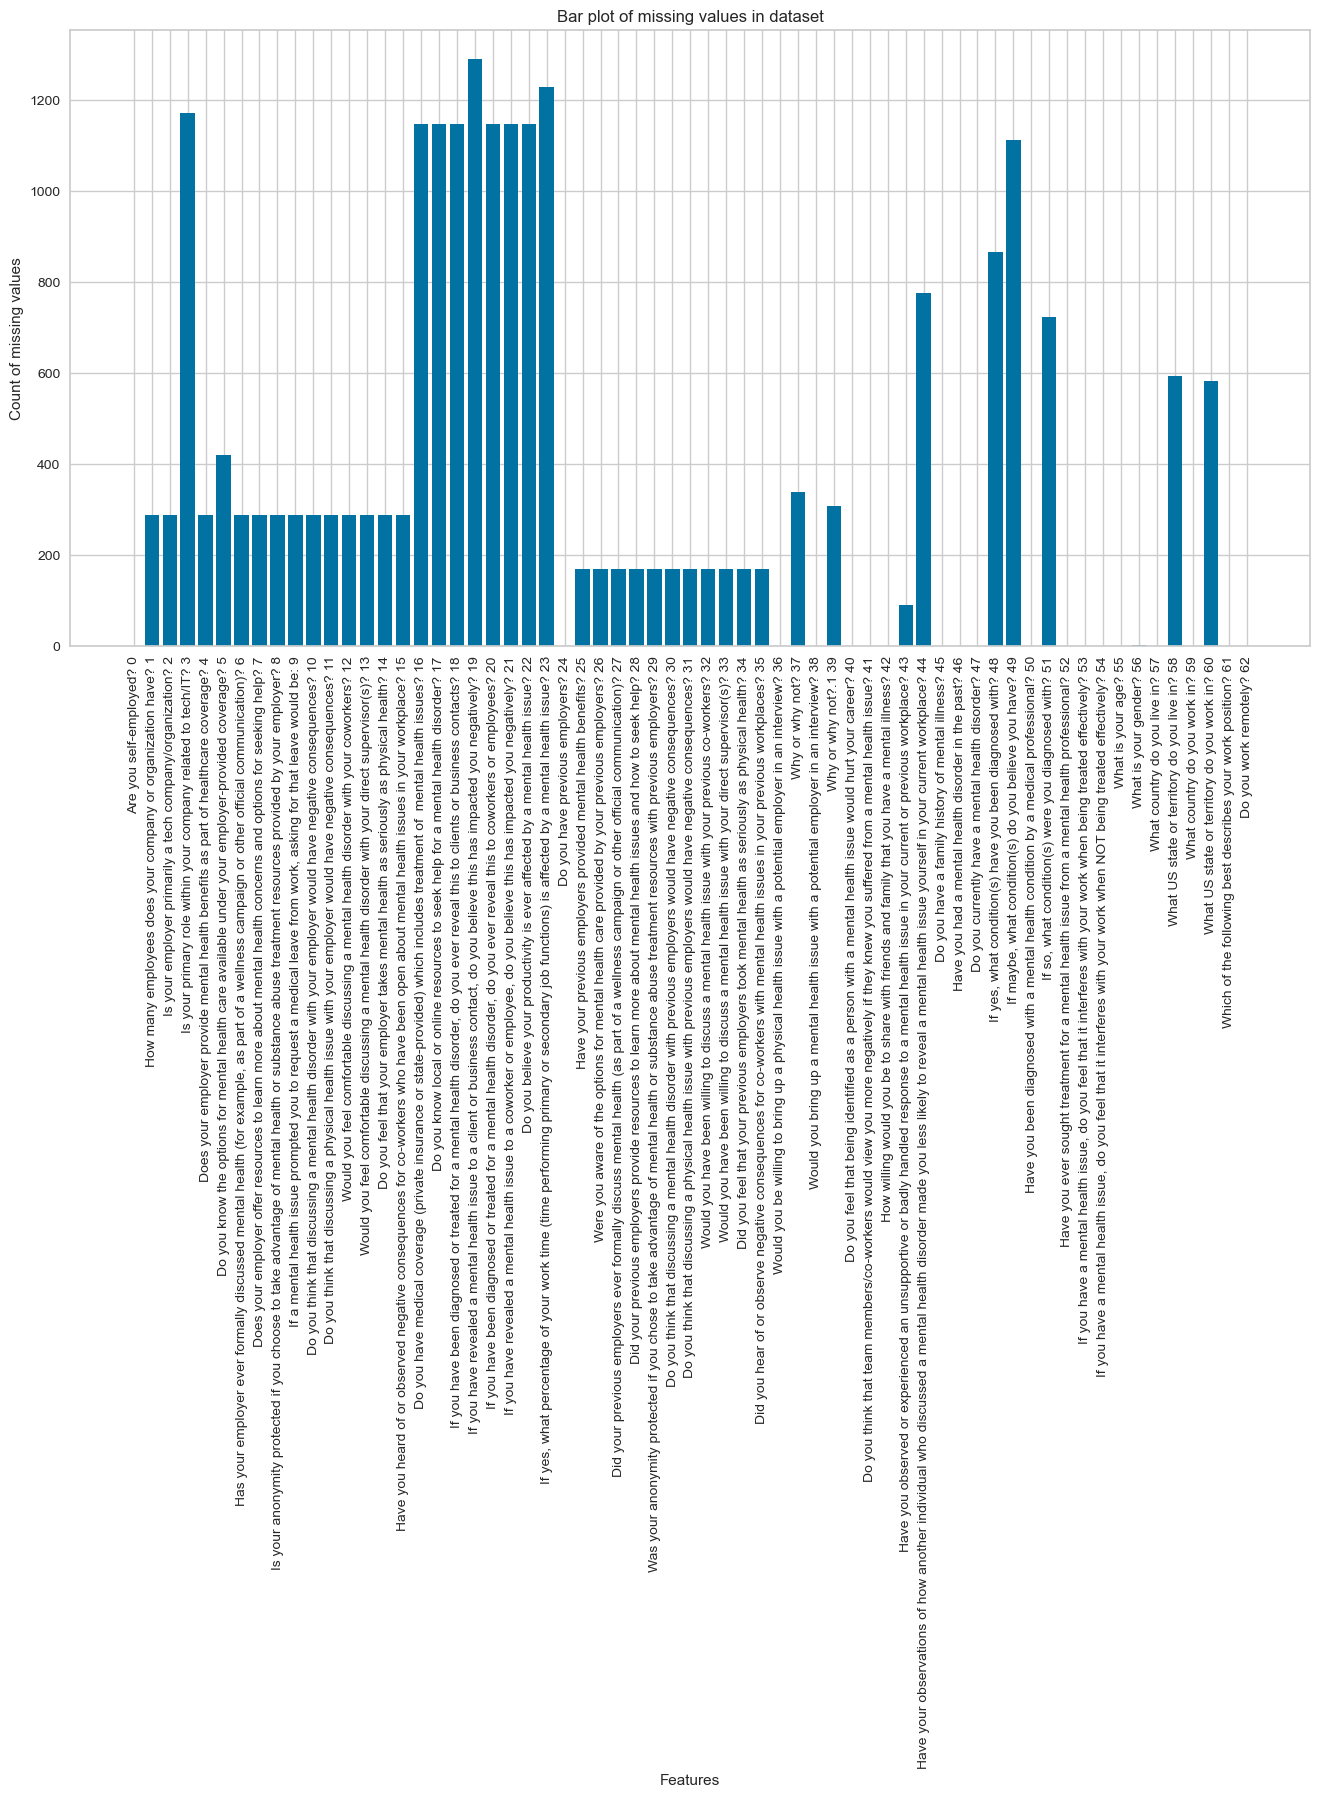

In [12]:
plot_missing(df)

**Overview of missing data:**
- Features 1 to 15, 16 to 23, 25 to 35 seem to follow a pattern. Missing values seem to be MNAR.

- Features 16 to 23, 3, 44,48,49,51 have a high number of missingness.

Let us also check for duplicated data.

In [13]:
df.duplicated().sum()

0

Before proceeding, we will rename the columns to improve their usability in our analysis.

In [14]:
new_cols= ["self_employed",
           "work_no_employees",
           "is_tech_employer",
           "is_tech_role",
           "has_mh_benefits",
           "has_mh_options",
           "discussed_mh",
           "has_mh_learn_resources",
           "has_anonimity",
           "absence_difficulty",
           "is_discussing_mh_neg",
           "is_discussing_ph_neg",
           "comf_discuss_mh_coworkers",
           "comf_discuss_mh_supervisors",
           "is_mh_equal_to_ph",
           "coworkers_neg_cons",
           "medical_cvrg",
           "seek_help_resources",
           "share_mh_issues",
           "shared_mh_neg",
           "share_mh_coworkers",
           "shared_mh_coworkers_neg",
           "mh_affected_productivity",
           "work_time_affected",
           "has_prev_employers",
           "has_mh_cvrg_prev",
           "has_mh_options_prev",
           "has_discussed_mh_prev",
           "has_mh_learn_resources_prev",
           "has_anonimity_prev",
           "is_discussing_mh_neg_prev",
           "is_discussing_ph_neg_prev",
           "comf_discuss_mh_coworkers_prev",
           "comf_discuss_mh_supervisors_prev",
           "is_mh_equal_to_ph_prev",
           "coworkers_mh_neg_prev",
           "share_ph_issue",
           "share_ph_issue_why",
           "share_mh_issue",
           "share_mh_issue_why",
           "mh_affect_career",
           "mh_issue_neg_on_coworkers",
           "mh_issue_family_share",
           "has_mh_bad_experience_work",
           "stopped_from_revealing",
           "has_mh_family_history",
           "has_mh_history",
           "has_issue_current",
           "mh_conditions",
           "mh_conditions_hypothetical",
           "is_diagnosed",
           "diagnosis",
           "prof_treatment",
           "treat_affect_work",
           "not_treat_affect_work",
           "age","gender",
           "country",
           "state",
           "work_country",
           "work_state",
           "position",
           "works_remote"
          ]

In [15]:
cols_dict = {o:n for o,n in zip(list(df.columns),new_cols)}
df.rename(columns=cols_dict, inplace=True)
df.head(1)

self_employed work_no_employees  is_tech_employer  is_tech_role  \
0              0            26-100               1.0           NaN   

                   has_mh_benefits has_mh_options discussed_mh  \
0  Not eligible for coverage / N/A            NaN           No   

  has_mh_learn_resources has_anonimity absence_difficulty  ...  \
0                     No  I don't know          Very easy  ...   

      treat_affect_work not_treat_affect_work age gender         country  \
0  Not applicable to me  Not applicable to me  39   Male  United Kingdom   

  state    work_country work_state            position works_remote  
0   NaN  United Kingdom        NaN  Back-end Developer    Sometimes  

[1 rows x 63 columns]

<a name="Clean-Data"></a>
# Clean Data
___

Features which have more than 50% missing values are not very informative. Imputation may introduce bias and inaccuracies because the models are relying heavily on the limited available data. Thus we will drop these features.

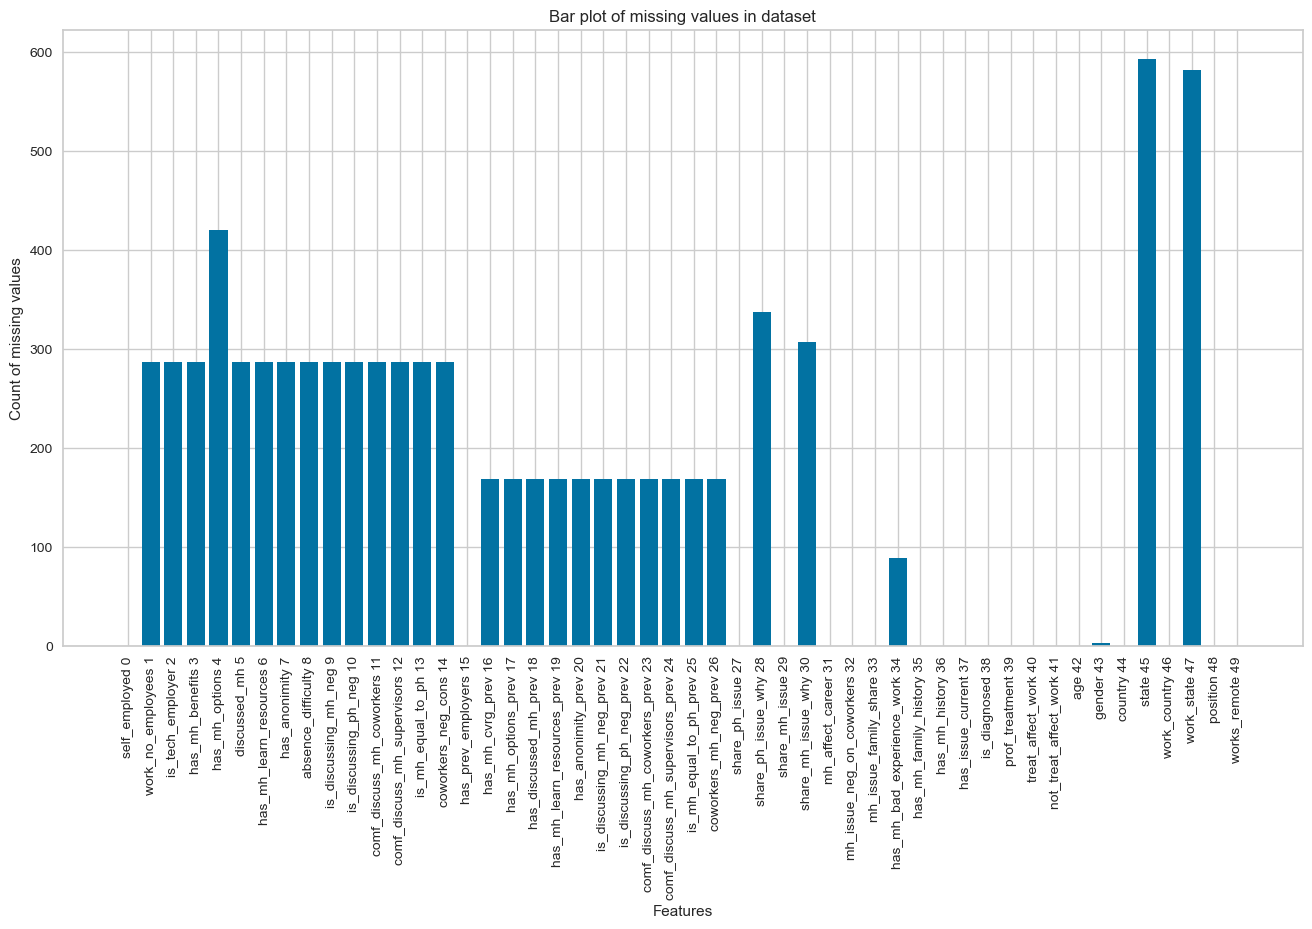

In [16]:
missing = df.isna().sum()
to_drop = missing[missing > df.shape[0]//2]
df.drop(columns=to_drop.index,axis=1,inplace=True)

plot_missing(df)

In [17]:
df.shape

(1433, 50)

Clean the values of questions by replacing long answers to 'Yes', 'No', 'N/A'.

In [18]:
replacements = {
    'Not eligible for coverage / N/A':'N/A',
    "I don't know":'N/A',
    'I am not sure':'N/A',
    'Maybe':'N/A',
    'Yes, I know several':'Yes',
    "No, I don't know any":'No',
    'I know some':'Yes',
    "No, because it doesn't matter":'No',
    'No, because it would impact me negatively':'No',
    'Not applicable to me':'N/A',
    'Yes, always':'Yes',
    'Sometimes, if it comes up':'Yes',
    "I'm not sure":'N/A',
    'Unsure':'N/A',
    'No, none did':'No',
    'Yes, they all did':'Yes',
    'Some did':'Yes',
    'N/A (not currently aware)':'N/A',
    'I was aware of some':'Yes',
    'Yes, I was aware of all of them':'Yes',
    'No, I only became aware later':'No',
    'None did':'No',
    'Some did':'Yes',
    'Yes, they all did':'Yes',
    'Some of them':'Yes',
    'None of them':'No',
    'Yes, all of them':'Yes',
    'Some of my previous employers':'Yes',
    'No, at none of my previous employers':'No',
    'Yes, at all of my previous employers':'Yes',
    "No, I don't think it would":'No',
    'Yes, they do':'Yes',
    'Yes, I think they would':'Yes',
    'No, they do not':'No',
    'Maybe/Not sure':'N/A',
    'Yes, I experienced':'Yes',
    'Yes, I observed':'Yes',
    'Yes, I think it would':'Yes',
    'No, it has not':'No',
    'Yes, it has':'Yes',
    "No, I don't think they would":'No',
    "Not applicable to me (I do not have a mental illness)":'N/A'
}
df = df.replace(to_replace=replacements)

Let's clean the 'gender' feature.

In [19]:
map_gender = {
    "male":'Male',"Male ":'Male',"M":"Male","m":'Male',"man":"Male","Male.":"Male",
    'Cis male':"Male", 'Male (cis)':"Male",'Man':"Male",'Sex is male':"Male",'cis male':"Male",
    'Malr':"Male",'Dude':"Male",
    "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ":"Male",
    'mail':"Male",'M|':"Male",'male ':"Male",'Cis Male':"Male",'cisdude':"Male",'cis man':"Male",'MALE':"Male",
    'Male (trans, FtM)':"Male",
    
    'Female':"Female",'female':"Female",'I identify as female.':"Female",'female ':"Female",
    'Female assigned at birth ':"Female",'F':"Female",'Woman':"Female",'fm':"Female",'f':"Female",
    'Cis female ':"Female",'Transitioned, M2F':"Female",'Female ':"Female",'woman':"Female",
    'female/woman':"Female",'Cisgender Female':"Female",' Female':"Female",'Cis-woman':"Female",
    'Female (props for making this a freeform field, though)':"Female","AFAB":"Female",
    
    'Bigender':"Other",'non-binary':"Other",'Genderfluid (born female)':"Other",'Other/Transfeminine':"Other",
    'Female or Multi-Gender Femme':"Other",'Androgynous':"Other",'male 9:1 female, roughly':"Other",'nb masculine':"Other",
    'genderqueer':"Other",'Genderfluid':"Other",'Enby':"Other",'genderqueer woman':"Other",'mtf':"Other",'Queer':"Other",
    'none of your business':"Other",'Other':"Other",'Agender':"Other",'Human':"Other",'Fluid':"Other",
    'Male/genderqueer':"Other",'fem':"Other",'Nonbinary':"Other",'human':"Other",'Unicorn':"Other",
    'Genderqueer':"Other",'Genderflux demi-girl':"Other",'female-bodied; no feelings about gender':"Other",'Transgender woman':"Other"
}
df['gender'] = df['gender'].replace(map_gender)
df['gender'].unique()

array(['Male', 'Female', 'Other', nan], dtype=object)

Let us deal with 'age'.

In [20]:
df['age'].describe()

count    1433.000000
mean       34.286113
std        11.290931
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: age, dtype: float64

Minimum and maximum ages are incompatible. There can be no age of 323 and childs of 3 years old do not work in tech companies.

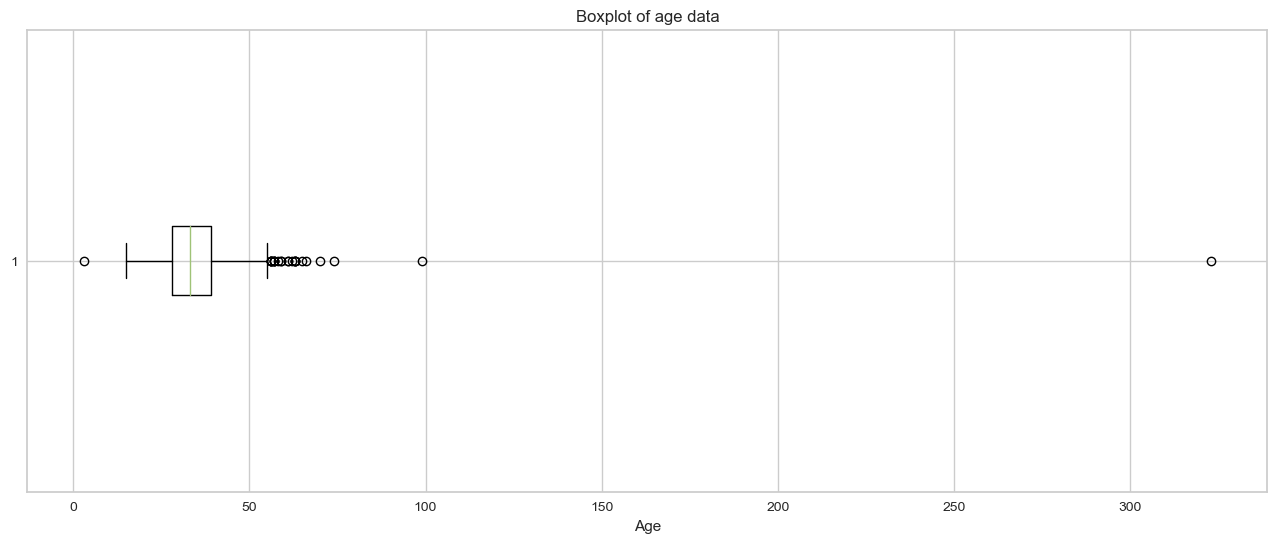

In [21]:
plt.figure(figsize=(16,6))
plt.boxplot(df['age'],vert=False)
plt.xlabel('Age')
plt.title('Boxplot of age data')
plt.show()

As we can see datapoints 3 and 323 are the outermost outliers. Though we have also many data points roughly above the value of 52 which are considered outliers.

Since fulltime legal work age is 18+ and the maximum age individuals can work before retirement is 67, we will set these values as limits and filter out outlying values.

In [22]:
filter_rows = (df['age'] < 18) | (df['age'] > 67)
len(df[filter_rows])

7

We have only seven observations in the above range, so we can simply drop these observations.

In [23]:
df = df.drop(df[filter_rows].index)
df.reset_index(drop=True, inplace=True)
df.shape

(1426, 50)

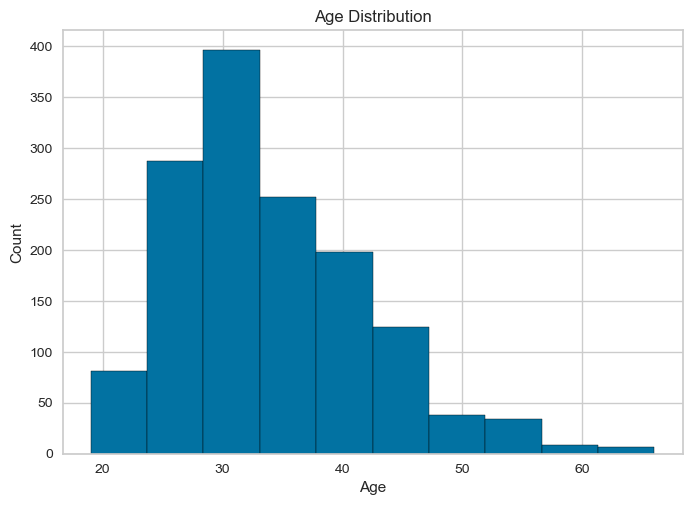

In [24]:
plt.hist(data=df, x='age',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Let's clean the 'position' feature.
The position feature is a multi-valued feature. We will find the unique labels/values contained in the feature and we will create unique one-hot encoded features to represent each value.

In [25]:
def find_unique_labels(data,feature,delimeter='|'):
    """Finds and returns the unique labels out of a multilabel categorical feature
    
    Parameters
    _ _ _ _ _ _
    
    data : pd.DataFrame
        The dataframe to process.
        
    feature : pd.Series
        The feature which will be processed.
        Raises Error if it contains nan values. Fill na values before using as input.
        
    Returns
    _ _ _ _
    
    list
        A list of the unique values/labels found in the feature.
    """
    labels = []
    for label in df[feature].unique():
        lab = re.split(fr'[{delimeter}]',label)
        labels.append(lab)
    labels = [item for lst in labels for item in lst]
    return list(set(labels))

labels = find_unique_labels(df,'position')
labels

['Back-end Developer',
 'Executive Leadership',
 'Sales',
 'Dev Evangelist/Advocate',
 'HR',
 'Front-end Developer',
 'DevOps/SysAdmin',
 'Supervisor/Team Lead',
 'Designer',
 'Support',
 'One-person shop',
 'Other']

In [26]:
for label in labels:
    df[label] = df['position'].str.contains(label, case=False, na=False)
    df[label] = df[label].astype('int')
df.drop('position',axis=1,inplace=True)
df.head()

self_employed work_no_employees  is_tech_employer has_mh_benefits  \
0              0            26-100               1.0             N/A   
1              0              6-25               1.0              No   
2              0              6-25               1.0              No   
3              1               NaN               NaN             NaN   
4              0              6-25               0.0             Yes   

  has_mh_options discussed_mh has_mh_learn_resources has_anonimity  \
0            NaN           No                     No           N/A   
1            Yes          Yes                    Yes           Yes   
2            NaN           No                     No           N/A   
3            NaN          NaN                    NaN           NaN   
4            Yes           No                     No            No   

           absence_difficulty is_discussing_mh_neg  ... Sales  \
0                   Very easy                   No  ...     0   
1               Somewhat easy                   No  ...     0   
2  Neither easy nor difficult                  N/A  ...     0   
3                         NaN                  NaN  ...     0   
4  Neither easy nor difficult                  Yes  ...     0   

  Dev Evangelist/Advocate HR Front-end Developer DevOps/SysAdmin  \
0                       0  0                   0               0   
1                       0  0                   1               0   
2                       0  0                   0               0   
3                       0  0                   0               0   
4                       1  0                   1               1   

   Supervisor/Team Lead Designer Support One-person shop Other  
0                     0        0       0               0     0  
1                     0        0       0               0     0  
2                     0        0       0               0     0  
3                     1        0       0               0     0  
4                     1        0       1               0     0  

[5 rows x 61 columns]

### At this point we have cleaned the dataset. The next steps are handling missing values and encoding categorical data before we can perform clustering and categorization.

<a name="Handle-Missing-Values"></a>
# Handle missing values
___

### Visualize missing values

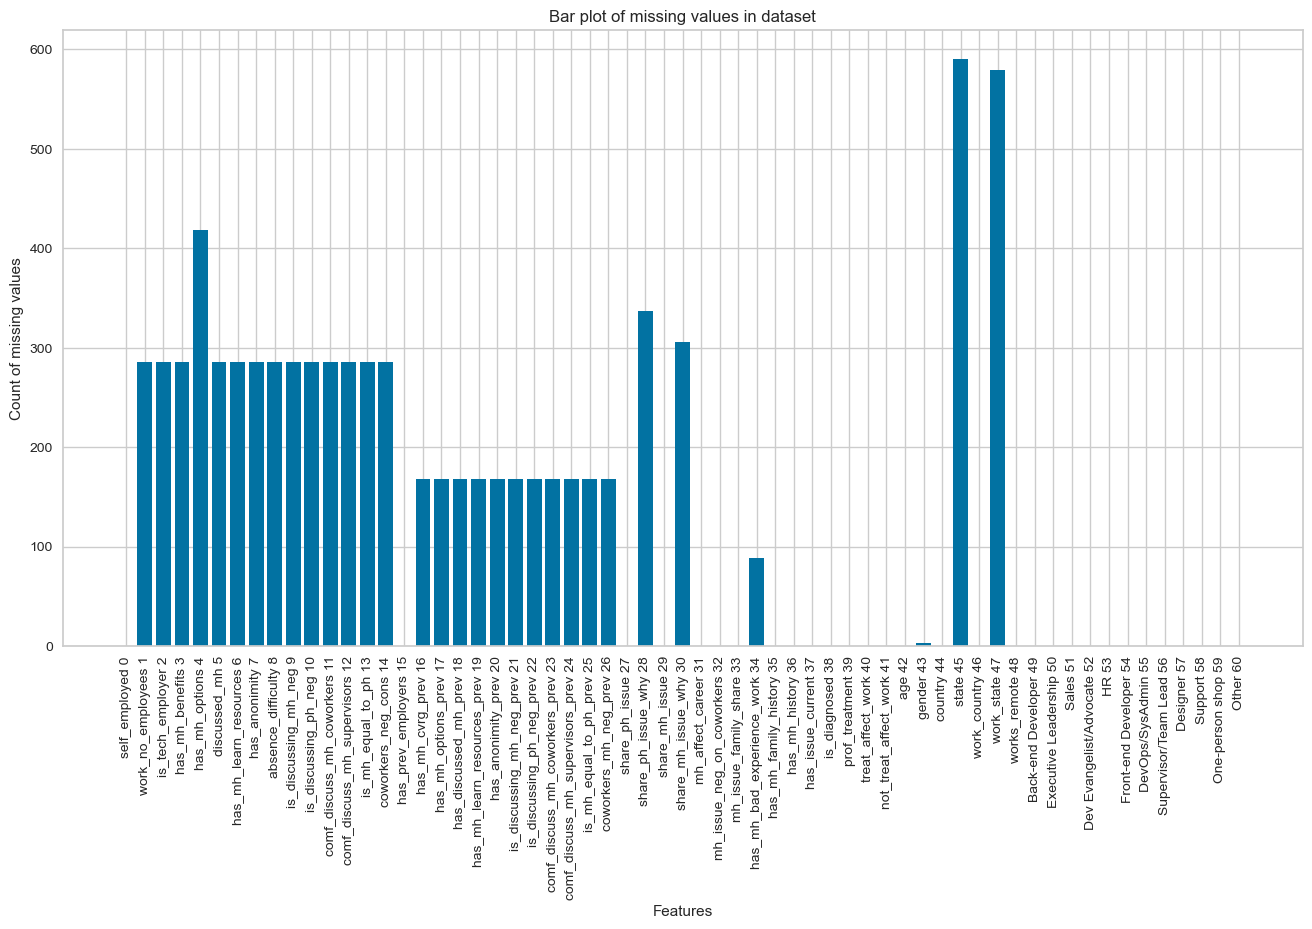

In [27]:
plot_missing(df)

This plot shows that the missing values are concentrated around some specific questions.
We can also see that many questions have the same amount of missing values. These patterns in missing data need to be examined before dropping or imputing missing values.

Let us check if the missing values of features 16 to 26 are all associated with 'not having a previous employer'.

In [28]:
# Select the features 16 to 26 where the feature 'has_prev_employers' == 0
mask = df['has_prev_employers'] == 0
selected_columns = df.iloc[:,16:27].columns
selection = df.loc[mask,selected_columns]

# Is the number of missing values of the selected features the same as the selected rows ?
# If so, people with no previous employers did not asnwer these questions.
(selection.isna().sum() == len(selection)).all()

True

Features 1 to 14 are questions which refer to workplace and employer. If a person is self employed it makes sense not to answer these questions. Let us check if features 1 to 14 have any association with feature 0 'self_employed'. We will check if people who are self_employed work for tech companies.

In [29]:
mask = df['self_employed'] == 1
selected_columns = df.iloc[:,[0,2]].columns

# Are the values of 'is_tech_employer 'NaN' when 'self_employed' is True ?
selection = df.loc[mask,selected_columns]
selection['is_tech_employer'].unique()

array([nan])

So all participants who are self-empoyed did not answer the question "Is your employer a tech company ?"

Is the number of persons who did not answer the question "Is your employer a tech company ?", the same as the number of missing values of the same feature ?

If so, this means that all the relevant questions about the employer do not apply to these persons.
An this will be the reason for the missing values of features 1 to 14

In [30]:
selection['is_tech_employer'].isna().sum() == df['is_tech_employer'].isna().sum()

True

We will fill the missing values with a negative answer since the information is already captured in the other features.

In [31]:
mask = df['self_employed'] == 1
selected_columns = df.iloc[:,1:15].columns

df['is_tech_employer'] = df['is_tech_employer'].astype('object') # To prevent errors in filling values of different type.

df.loc[mask,selected_columns] = df.loc[mask,selected_columns].fillna('No')

mask = df['has_prev_employers']==0
columns = df.columns[16:27]

df.loc[mask,columns] = df.loc[mask,columns].fillna('No')

#Preventing inconsistencies in data structure.
df['absence_difficulty'] = df['absence_difficulty'].replace({'No':'Very easy'})
df['work_no_employees'] = df['work_no_employees'].replace({'No':'1-5'})

Features : 'share_ph_issue_why' and 'share_mh_issue_why' are text features. Processing these features would greatly increase the number of dimensions in the dataset. Thus for this exercise will we simply drop these features.

In [32]:
df = df.drop(['share_ph_issue_why','share_mh_issue_why'],axis=1)

Let us check the missingness of 'has_mh_options'

In [33]:
df.loc[df['has_mh_options'].isna()].head(15)

self_employed work_no_employees is_tech_employer has_mh_benefits  \
0                0            26-100              1.0             N/A   
2                0              6-25              1.0              No   
20               0              6-25              1.0              No   
29               0              6-25              1.0             N/A   
50               0            26-100              1.0              No   
61               0            26-100              0.0             N/A   
75               0            26-100              1.0              No   
90               0           100-500              0.0              No   
92               0              6-25              1.0              No   
148              0    More than 1000              1.0              No   
173              0              6-25              1.0              No   
177              0              6-25              1.0              No   
179              0              6-25              1.0              No   
181              0               1-5              1.0             N/A   
200              0            26-100              1.0             N/A   

    has_mh_options discussed_mh has_mh_learn_resources has_anonimity  \
0              NaN           No                     No           N/A   
2              NaN           No                     No           N/A   
20             NaN           No                     No           N/A   
29             NaN           No                     No           Yes   
50             NaN           No                     No           N/A   
61             NaN           No                     No           N/A   
75             NaN           No                     No           N/A   
90             NaN           No                     No           N/A   
92             NaN          Yes                    N/A           N/A   
148            NaN           No                     No           N/A   
173            NaN           No                     No            No   
177            NaN          Yes                     No           Yes   
179            NaN           No                    Yes           N/A   
181            NaN          Yes                    N/A           N/A   
200            NaN           No                    N/A           Yes   

             absence_difficulty is_discussing_mh_neg  ... Sales  \
0                     Very easy                   No  ...     0   
2    Neither easy nor difficult                  N/A  ...     0   
20                    Very easy                   No  ...     0   
29                Somewhat easy                   No  ...     0   
50                Somewhat easy                  N/A  ...     0   
61               Very difficult                  Yes  ...     0   
75                    Very easy                   No  ...     0   
90                          N/A                  N/A  ...     0   
92   Neither easy nor difficult                   No  ...     0   
148              Very difficult                  Yes  ...     0   
173  Neither easy nor difficult                  N/A  ...     0   
177               Somewhat easy                   No  ...     0   
179                   Very easy                   No  ...     0   
181                   Very easy                   No  ...     0   
200                   Very easy                   No  ...     0   

    Dev Evangelist/Advocate HR Front-end Developer DevOps/SysAdmin  \
0                         0  0                   0               0   
2                         0  0                   0               0   
20                        0  0                   0               0   
29                        0  0                   0               0   
50                        0  0                   0               0   
61                        0  0                   0               1   
75                        0  0                   1               1   
90                        0  0                   0

Seems that 'has_mh_options' is affected by 'has_mh_benefits'

In [34]:
df.loc[df['has_mh_options'].isna(), 'has_mh_benefits'].unique()

array(['N/A', 'No'], dtype=object)

In [35]:
df.loc[df['has_mh_options'].notna(), 'has_mh_benefits'].unique()

array(['No', 'Yes', 'N/A'], dtype=object)

Seems that people who do not have mental health benefits as part of their healthcare coverage do not know about options for mental health care available under their employer-provided coverage. Or the opposite. People who do not know about options for mental health care available under their employer-provided coverage, do not have mental health benefits.
Either way we can fill these missing values with a simple 'No' to cover the missingness associated with these values.

In [36]:
df['has_mh_options'] = df['has_mh_options'].fillna('No')

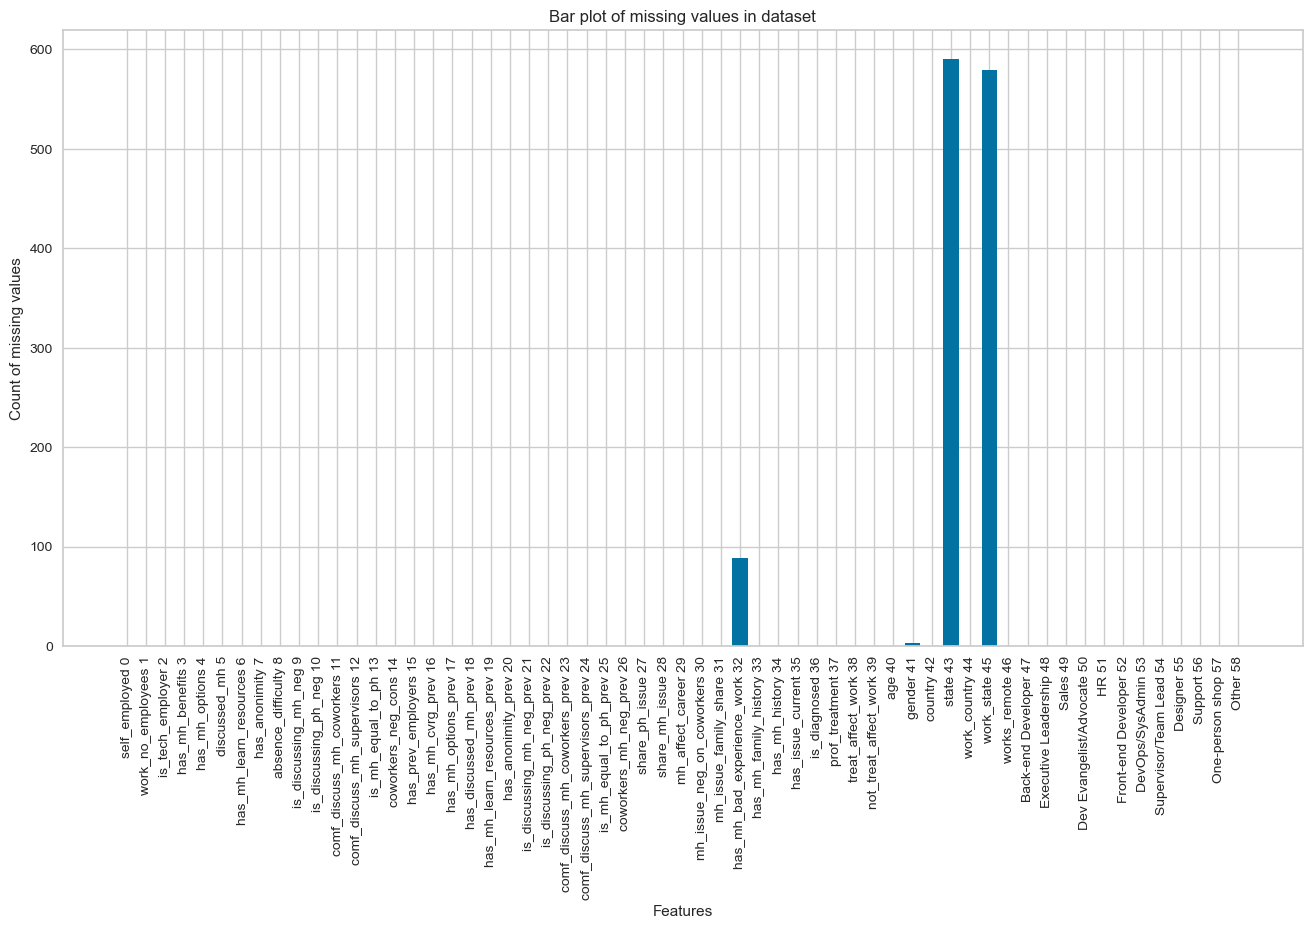

In [37]:
plot_missing(df)

Let have a look at : 'has_mh_bad_experience_work'.

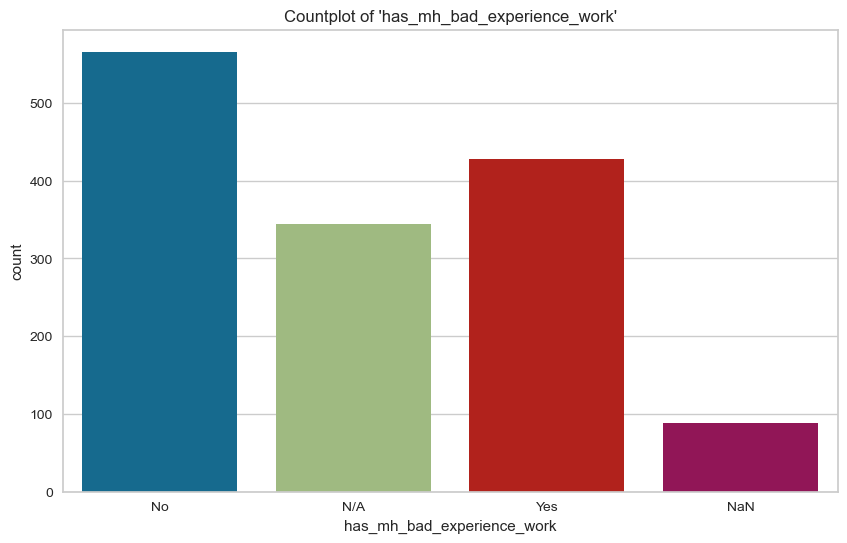

In [38]:
df_temp = df['has_mh_bad_experience_work'].fillna('NaN') # So we can use countplot
plt.figure(figsize=(10,6))
sns.countplot(x=df_temp)
plt.title("Countplot of 'has_mh_bad_experience_work'")
plt.show()

Missing values in 'has_mh_bad_experience_work' seem to be MCAR (Missing Completely At Random). So we will fill them with N/A value.

In [39]:
df['has_mh_bad_experience_work'] = df['has_mh_bad_experience_work'].fillna('N/A')

We will fill the missing values of the 'gender' feature with the mode.

In [40]:
mode = df['gender'].mode()[0]
df['gender'] = df['gender'].fillna(mode)

Let us look at the missing values of state.

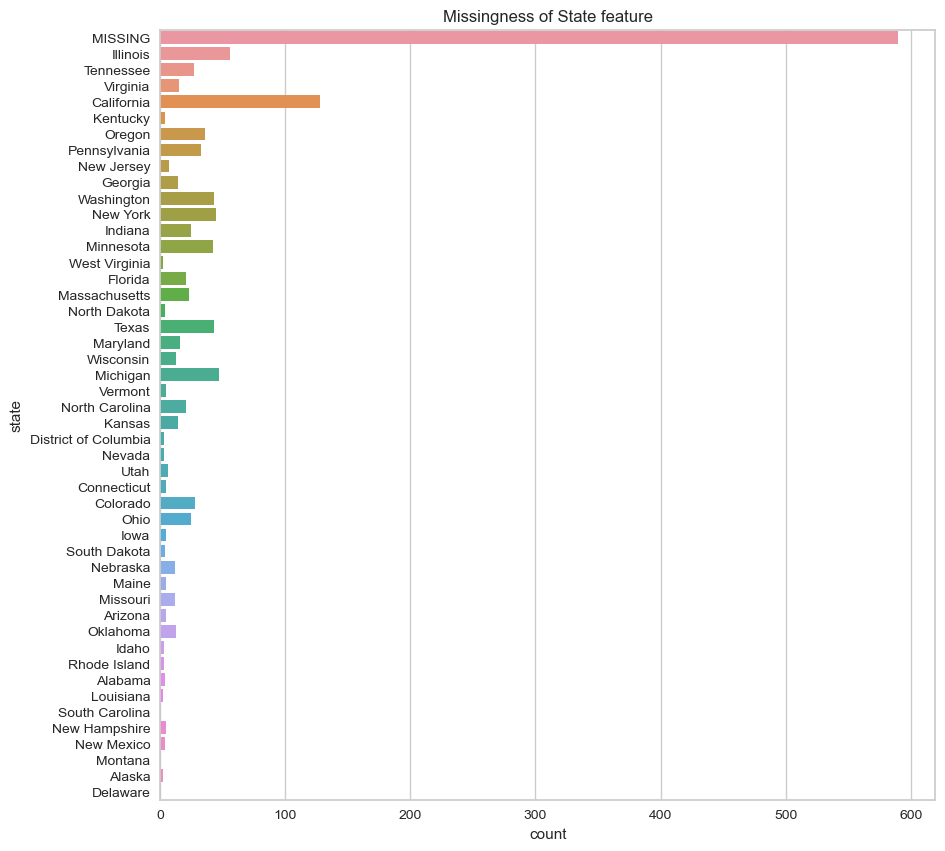

In [41]:
plt.figure(figsize=(10,10))
df['state'] = df['state'].fillna('MISSING')
sns.countplot(y='state',data=df)
plt.title('Missingness of State feature')
plt.show()

In [42]:
df['state'].value_counts(normalize=True)*100

state
MISSING                 41.374474
California               8.976157
Illinois                 3.927069
Michigan                 3.295933
New York                 3.155680
Washington               3.015428
Texas                    3.015428
Minnesota                2.945302
Oregon                   2.524544
Pennsylvania             2.314165
Colorado                 1.963534
Tennessee                1.893408
Ohio                     1.753156
Indiana                  1.753156
Massachusetts            1.612903
North Carolina           1.472651
Florida                  1.472651
Maryland                 1.122020
Virginia                 1.051893
Kansas                   0.981767
Georgia                  0.981767
Wisconsin                0.911641
Oklahoma                 0.911641
Missouri                 0.841515
Nebraska                 0.841515
New Jersey               0.490884
Utah                     0.420757
Iowa                     0.350631
New Hampshire            0.350631
Arizona 

Since there are so many missing values we will simply drop this feature.

In [43]:
df.drop(['state','work_state'],axis=1,inplace=True)

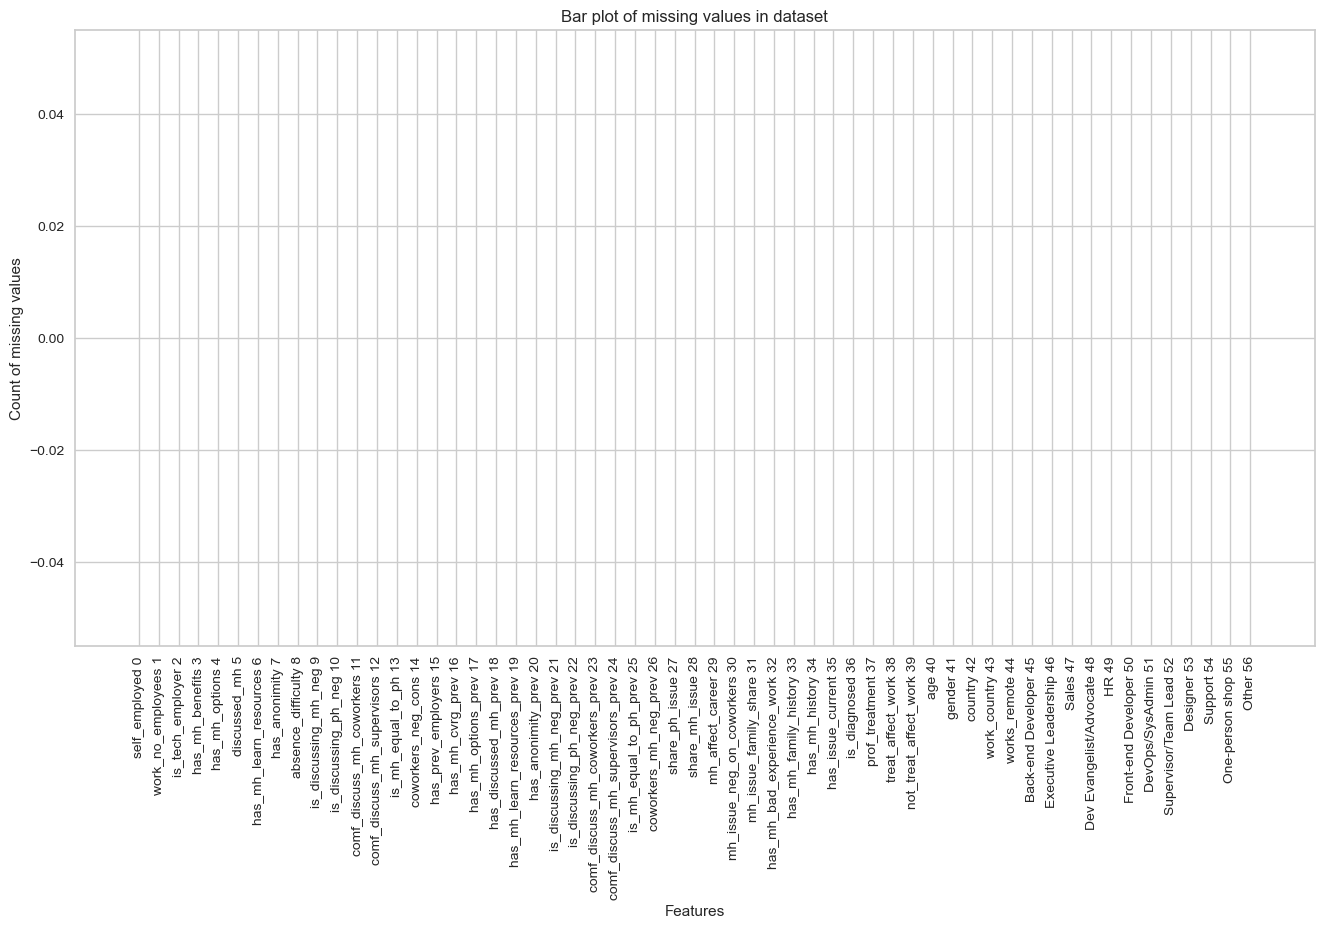

In [44]:
plot_missing(df)

Before we proceed we need to handle the 'N/A' values which we encoded earlier. ( .replace(...:'N/A'))

In [45]:
df.shape

(1426, 57)

In [46]:
#Drop columns where 'N/A' values are more than 50% of the total samples.
mask = df.apply(lambda col:col[col=='N/A'].count())
to_drop = mask[mask>df.shape[0]//2].index
df.drop(to_drop,axis=1,inplace=True)

In [47]:
for col in df.columns:
    mode = df[col].mode()[0]
    
    #Drop the columns where 'N/A' is the most frequent value.
    if mode=='N/A':
        df.drop(col,axis=1,inplace=True)
        continue
    df[col] = df[col].replace({'N/A':mode})

In [48]:
df.shape

(1426, 51)

**Before we proceed let us take a look at the unique values of the following features.**

In [49]:
temp = df[['country','work_country']]
for col in temp:
    print(temp[col].value_counts())
    print()

country
United States of America    836
United Kingdom              180
Canada                       76
Germany                      58
Netherlands                  48
Australia                    35
Sweden                       19
France                       16
Ireland                      15
Switzerland                  10
New Zealand                   9
India                         9
Brazil                        9
Russia                        9
Bulgaria                      7
Finland                       7
Denmark                       7
Italy                         5
Belgium                       5
South Africa                  4
Romania                       4
Spain                         4
Poland                        4
Austria                       4
Norway                        3
Pakistan                      3
Chile                         3
Czech Republic                3
Japan                         2
Israel                        2
Other                         2


 As we can see we have many observations with a small number of datapoints. Statistically these observations cannot convey much information. We will create a new observation which will capture this information.

In [50]:
for col in temp:
    df[col] = df[col].apply(lambda x: 'Other' if df[col].value_counts()[x] < 30 else x)

temp = df[['country','work_country']]
for col in temp:
    print(temp[col].value_counts())
    print()

country
United States of America    836
Other                       193
United Kingdom              180
Canada                       76
Germany                      58
Netherlands                  48
Australia                    35
Name: count, dtype: int64

work_country
United States of America    847
Other                       185
United Kingdom              183
Canada                       72
Germany                      58
Netherlands                  47
Australia                    34
Name: count, dtype: int64



In [51]:
(df['country'] == df['work_country']).mean()

0.982468443197756

As we can see from above, most people work in the country they live.

In [52]:
df.head()

self_employed work_no_employees is_tech_employer has_mh_benefits  \
0              0            26-100              1.0             Yes   
1              0              6-25              1.0              No   
2              0              6-25              1.0              No   
3              1               1-5               No              No   
4              0              6-25              0.0             Yes   

  has_mh_options discussed_mh has_mh_learn_resources  \
0             No           No                     No   
1            Yes          Yes                    Yes   
2             No           No                     No   
3             No           No                     No   
4            Yes           No                     No   

           absence_difficulty is_discussing_mh_neg is_discussing_ph_neg  ...  \
0                   Very easy                   No                   No  ...   
1               Somewhat easy                   No                   No  ...   
2  Neither easy nor difficult                   No                   No  ...   
3                   Very easy                   No                   No  ...   
4  Neither easy nor difficult                  Yes                   No  ...   

  Sales Dev Evangelist/Advocate HR Front-end Developer  DevOps/SysAdmin  \
0     0                       0  0                   0                0   
1     0                       0  0                   1                0   
2     0                       0  0                   0                0   
3     0                       0  0                   0                0   
4     0                       1  0                   1                1   

  Supervisor/Team Lead Designer Support One-person shop Other  
0                    0        0       0               0     0  
1                    0        0       0               0     0  
2                    0        0       0               0     0  
3                    1        0       0               0     0  
4                    1        0       1               0     0  

[5 rows x 51 columns]

One last step. Change the values of the 'is_tech_employer' feature.

In [53]:
df['is_tech_employer'] = df['is_tech_employer'].replace({1.0:'Yes',0.0:'No'}) # To be consistent with the values of the rest of the features.

In [54]:
df.shape

(1426, 51)

In [55]:
df.to_csv('cleaned_data.csv',index=False)

### At this point we have handled all missing values. We can now proceed to encode the categorical features.

<a name="Encoding"></a>
# Encoding
___

Distinquish features.

In [56]:
ordinal = ['work_no_employees',
           'absence_difficulty',
           'mh_issue_family_share',
           'not_treat_affect_work',
           'works_remote']
numerical = ['age']
already_encoded = ['self_employed',
                  'has_prev_employers',
                  'prof_treatment',
                  'DevOps/SysAdmin',
                  'Front-end Developer',
                   'Designer',
                   'HR',
                   'Sales',
                   'Dev Evangelist/Advocate',
                   'Executive Leadership',
                   'Back-end Developer',
                   'One-person shop',
                   'Support',
                   'Supervisor/Team Lead',
                   'Other'
                  ]
nominal = ['is_tech_employer',
           'has_mh_benefits',
           'has_mh_options',
           'discussed_mh',
           'has_mh_learn_resources',
           'is_discussing_mh_neg',
           'is_discussing_ph_neg',
           'comf_discuss_mh_coworkers',
           'comf_discuss_mh_supervisors',
           'is_mh_equal_to_ph',
           'coworkers_neg_cons',
           'has_mh_cvrg_prev',
           'has_discussed_mh_prev',
           'has_mh_learn_resources_prev',
           'is_discussing_mh_neg_prev',
           'is_discussing_ph_neg_prev',
           'comf_discuss_mh_coworkers_prev',
           'comf_discuss_mh_supervisors_prev',
           'is_mh_equal_to_ph_prev',
           'coworkers_mh_neg_prev',
           'share_mh_issue',
           'mh_affect_career',
           'has_mh_bad_experience_work',
           'has_mh_family_history',
           'has_mh_history',
           'has_issue_current',
           'is_diagnosed'
          ]

We will use a custom function to encode ordinal categorical data, to ensure that the order among the values is maintained properly.
We will also scale the obtained features to ensure that the clustering algorithms will be able to calculate the distances
between the data points appropriately.

In [57]:
df = ordinal_encoding(df,'work_no_employees',['1-5','6-25','26-100','100-500','500-1000','More than 1000'])
df = ordinal_encoding(df, 'absence_difficulty',['Very easy','Somewhat easy','Neither easy nor difficult','Somewhat difficult','Very difficult'])
df = ordinal_encoding(df, 'mh_issue_family_share',['Very open','Somewhat open','Neutral','Somewhat not open','Not open at all'])
df = ordinal_encoding(df, 'not_treat_affect_work',['Often','Sometimes','Rarely','Never'])
df = ordinal_encoding(df, 'works_remote',['Always','Sometimes','Never'])

Encode nominal Yes/No features.

In [58]:
df.replace({'No':0,'Yes':1},inplace=True)

Nominal features which need to be one hot encoded.

In [59]:
df_to_onehot = df[['gender','country','work_country']]
df_onehot = pd.get_dummies(df_to_onehot)
df_onehot = df_onehot.astype(int)

In [60]:
df = pd.concat([df,df_onehot],axis=1)
df.drop(columns=['gender','country','work_country'],inplace=True)

In [61]:
scaler = MinMaxScaler()
age_scaled = scaler.fit_transform(df[['age']])
df['age'] = age_scaled

In [62]:
df.head()

self_employed  work_no_employees is_tech_employer has_mh_benefits  \
0              0                  3                1               1   
1              0                  2                1               0   
2              0                  2                1               0   
3              1                  1                0               0   
4              0                  2                0               1   

  has_mh_options discussed_mh has_mh_learn_resources  absence_difficulty  \
0              0            0                      0                   1   
1              1            1                      1                   2   
2              0            0                      0                   3   
3              0            0                      0                   1   
4              1            0                      0                   3   

  is_discussing_mh_neg is_discussing_ph_neg  ... country_Other  \
0                    0                    0  ...             0   
1                    0                    0  ...             0   
2                    0                    0  ...             0   
3                    0                    0  ...             0   
4                    1                    0  ...             0   

  country_United Kingdom country_United States of America  \
0                      1                                0   
1                      0                                1   
2                      1                                0   
3                      1                                0   
4                      0                                1   

  work_country_Australia  work_country_Canada work_country_Germany  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    0                    0   

  work_country_Netherlands work_country_Other work_country_United Kingdom  \
0                        0                  0                           1   
1                        0                  0                           0   
2                        0                  0                           1   
3                        0                  0                           1   
4                        0                  0                           0   

  work_country_United States of America  
0                                     0  
1                                     1  
2                                     0  
3                                     0  
4                                     1  

[5 rows x 65 columns]

In [63]:
df.shape

(1426, 65)

In [64]:
df = df.apply(lambda col: col.astype('int') if col.dtype in ['object','int64'] else col)

In [65]:
df.dtypes

self_employed                              int32
work_no_employees                          int32
is_tech_employer                           int32
has_mh_benefits                            int32
has_mh_options                             int32
discussed_mh                               int32
has_mh_learn_resources                     int32
absence_difficulty                         int32
is_discussing_mh_neg                       int32
is_discussing_ph_neg                       int32
comf_discuss_mh_coworkers                  int32
comf_discuss_mh_supervisors                int32
is_mh_equal_to_ph                          int32
coworkers_neg_cons                         int32
has_prev_employers                         int32
has_mh_cvrg_prev                           int32
has_discussed_mh_prev                      int32
has_mh_learn_resources_prev                int32
is_discussing_mh_neg_prev                  int32
is_discussing_ph_neg_prev                  int32
comf_discuss_mh_cowo

In [66]:
df.to_csv('encoded_data.csv',index=False)

### At this point we have encoded all features. We can now proceed to apply dimensionality reduction and clustering algorithms.

<a name="Clustering"></a>
# Clustering
___

**We will apply two algorithms to obtain the clusters for the dataset and compare them.**
- Kmeans
- Hierarchical clustering

**Then we will apply PCA, T-SNE and MDS dimensionality reduction algorithms to visualize the dataset in reduced dimensions. We will choose the best results.**

### KMeans

Let us visualize the optimal number of clusters.

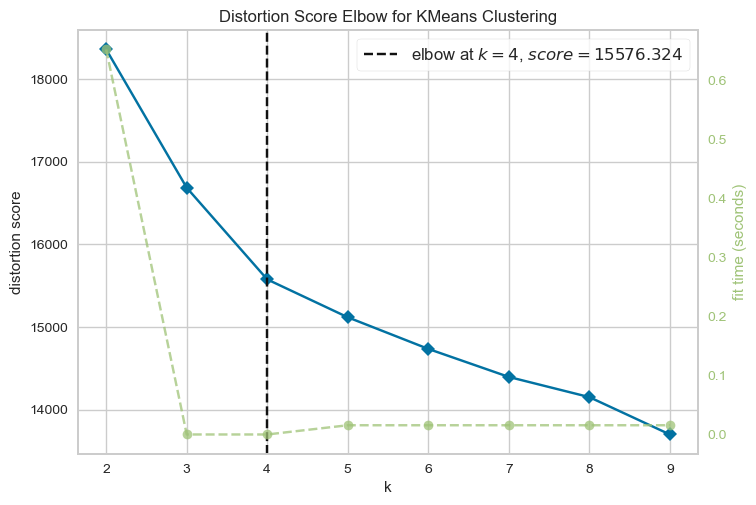

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df)
visualizer.show()

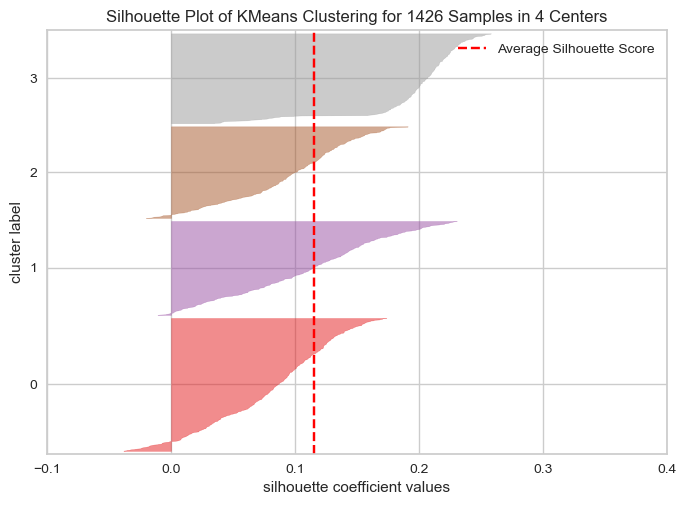

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1426 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [68]:
#Evaluate obtained clusters
kmeans = KMeans(n_clusters=4,random_state=42)
silhouette_visualizer = SilhouetteVisualizer(kmeans)
silhouette_visualizer.fit(df)
silhouette_visualizer.show()

In [69]:
kmeans = KMeans(n_clusters=4,random_state=42)
k_labels = kmeans.fit_predict(df)

### Hierarchical Agglomerative clustering

(Through experimentation the only method which forms well-formed clusters is ward.)

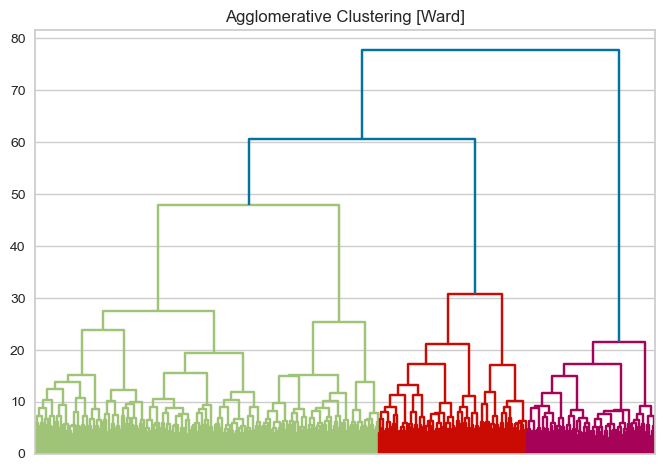

In [70]:
linked = linkage(df, method='ward')
dendrogram(linked,distance_sort='descending',no_labels=True)
plt.title('Agglomerative Clustering [Ward]')
plt.show()

In [71]:
agglo_labels = fcluster(linked, 4, criterion='maxclust')

In [72]:
#Evaluate the obtained clusters

# Silhouette Score
silhouette_avg = silhouette_score(df, agglo_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Davies-Bouldin Index
db_index = davies_bouldin_score(df, agglo_labels)
print(f'Davies-Bouldin Index: {db_index}')

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(df, agglo_labels)
print(f'Calinski-Harabasz Index: {ch_index}')


Silhouette Score: 0.10169388687525345
Davies-Bouldin Index: 2.477839621130291
Calinski-Harabasz Index: 177.5512002514573


As we can see from the results above we get low scores in evaluation metrics.

### PCA

C:\Users\kast3\AppData\Local\Temp\ipykernel_13068\766643739.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


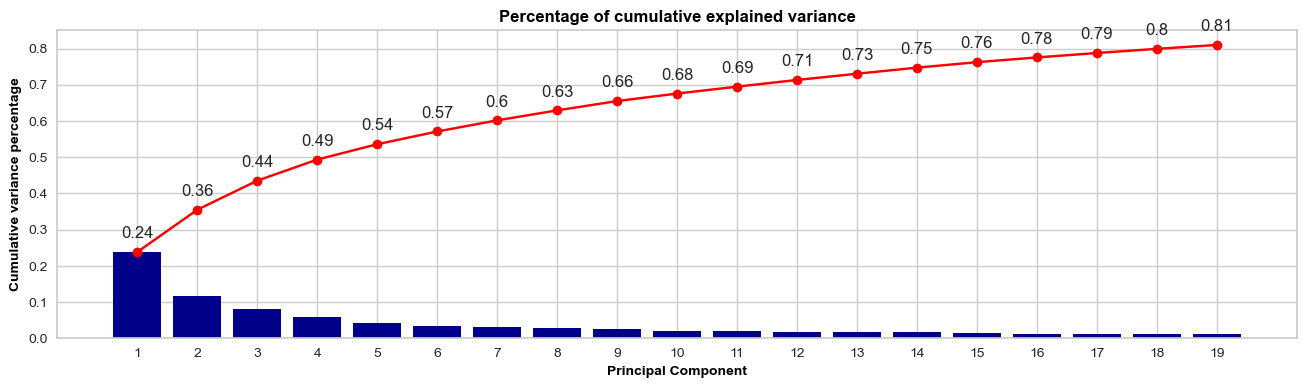

In [73]:
pca = PCA(n_components=0.8)
data_pca = pca.fit_transform(df)

explained_variance = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(figsize=(16,4))

df_data_pca = pd.DataFrame(data_pca)
x_positions = np.arange(len(df_data_pca.columns))+1

ax.plot(x_positions,
        explained_variance,
        marker = 'o',
        color='red',
        markeredgecolor = 'black'
       )
ax.bar(x = np.arange(pca.n_components_)+1,
      height = pca.explained_variance_ratio_,
      color = 'darkblue')

for x,y in zip(x_positions, explained_variance):
    label = round(y,2)
    ax.annotate(label, (x,y),textcoords="offset points",xytext=(0,10),ha='center')

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Percentage of cumulative explained variance', fontsize = 12, fontweight = 'bold', color = 'black')
ax.set_xlabel('Principal Component',  fontsize = 10, fontweight = 'bold', color = 'black')
ax.set_ylabel('Cumulative variance percentage',  fontsize = 10, fontweight = 'bold', color = 'black')
fig.show()

Pca cannot explain the variance in the dataset, only until the 19th component. So we need to use some other dimensionality reduction algorithm.

### MDS

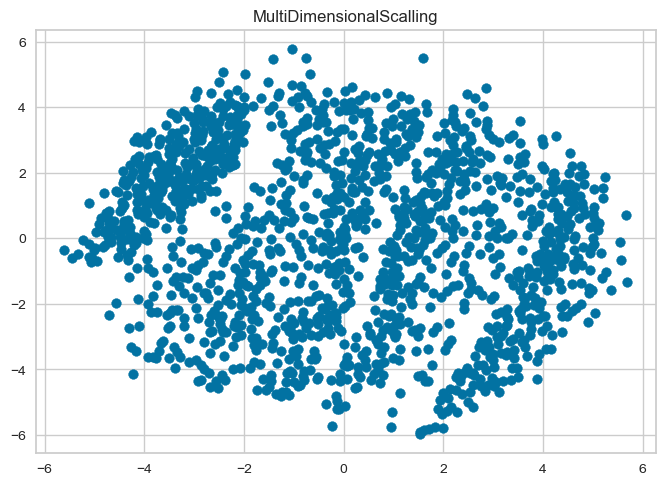

In [74]:
mds = MDS(random_state=42)
data_mds = mds.fit_transform(df)

plt.title('MultiDimensionalScalling')
plt.scatter(data_mds[:,0],data_mds[:,1])
plt.show()

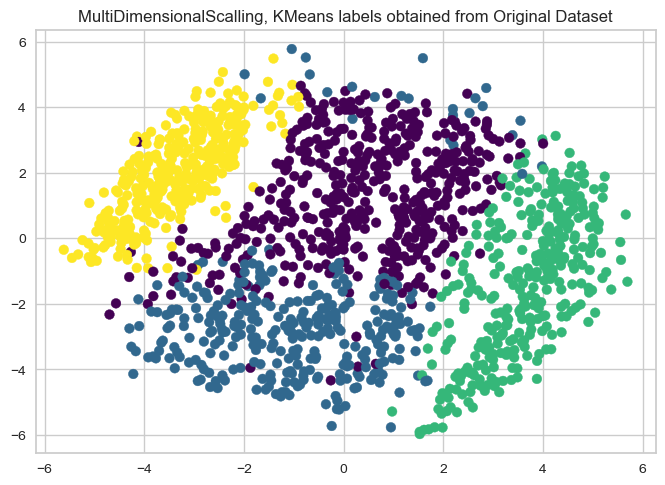

In [75]:
plt.title('MultiDimensionalScalling, KMeans labels obtained from Original Dataset')
plt.scatter(data_mds[:,0],data_mds[:,1],c=k_labels,cmap='viridis')
plt.show()

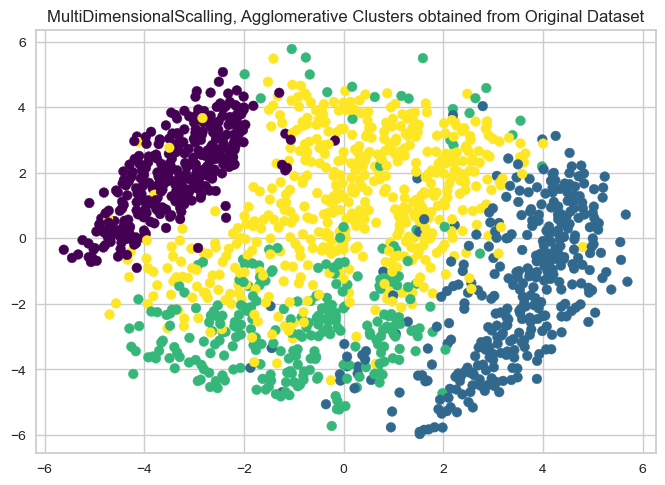

In [76]:
plt.title('MultiDimensionalScalling, Agglomerative Clusters obtained from Original Dataset')
plt.scatter(data_mds[:,0],data_mds[:,1],c=agglo_labels, cmap='viridis')
plt.show()

### T-SNE

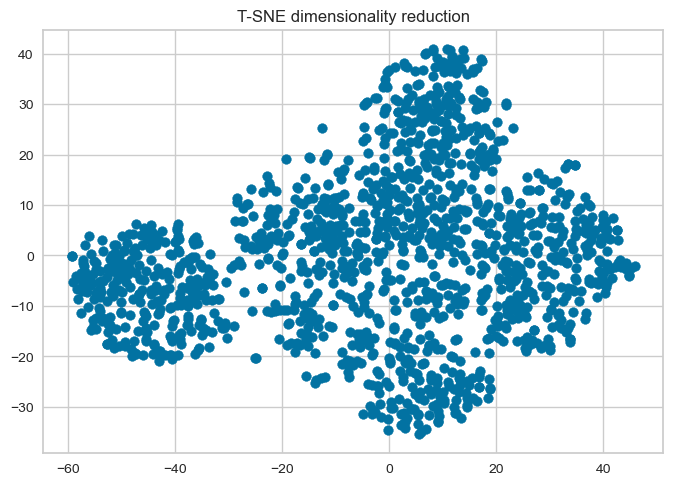

In [77]:
tsne = TSNE(random_state=123)
data_tsne = tsne.fit_transform(df)
plt.scatter(data_tsne[:,0],data_tsne[:,1])
plt.title('T-SNE dimensionality reduction')
plt.show()

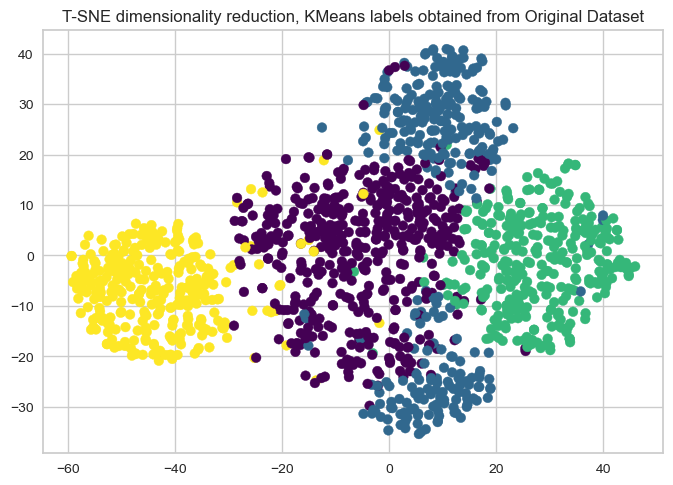

In [78]:
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=k_labels,cmap='viridis')
plt.title('T-SNE dimensionality reduction, KMeans labels obtained from Original Dataset')
plt.show()

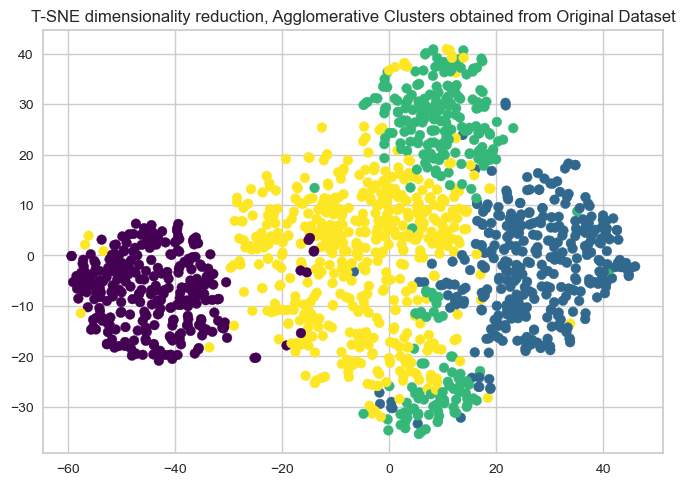

In [79]:
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=agglo_labels,cmap='viridis')
plt.title('T-SNE dimensionality reduction, Agglomerative Clusters obtained from Original Dataset')
plt.show()

As we can see from the above results, both KMeans and Hierarchical Agglomerative Clustering fail to produce well formed clusters on the original dataset. We will apply the clustering algorithms on the reduced dataset.

**KMeans for MDS data.**

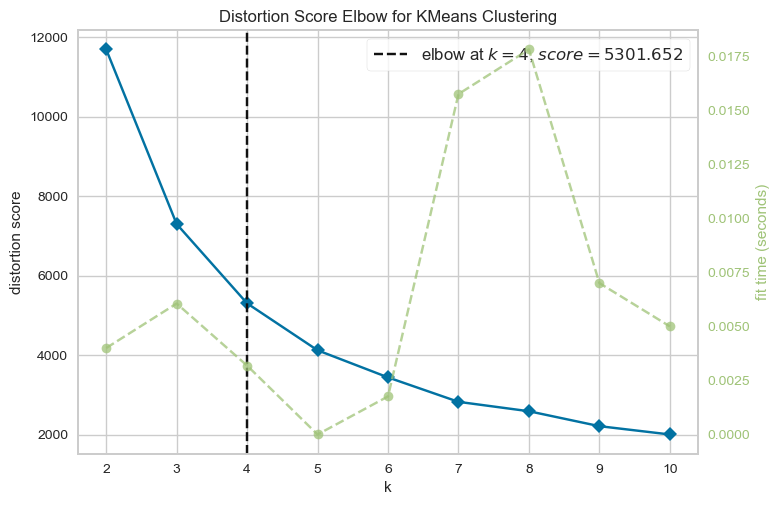

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
kmeans = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans)
elbow_visualizer.fit(data_mds)
elbow_visualizer.show()

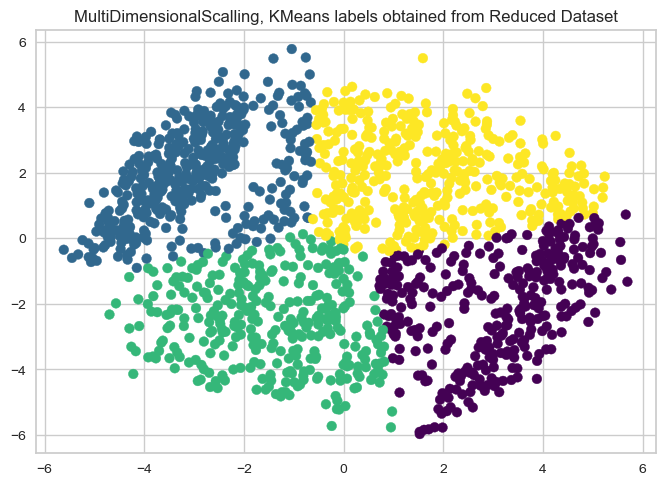

In [81]:
kmeans = KMeans(n_clusters=4)
kmeans_labels_mds = kmeans.fit_predict(data_mds)
plt.title('MultiDimensionalScalling, KMeans labels obtained from Reduced Dataset')
plt.scatter(data_mds[:,0],data_mds[:,1],c=kmeans_labels_mds,cmap='viridis')
plt.show()

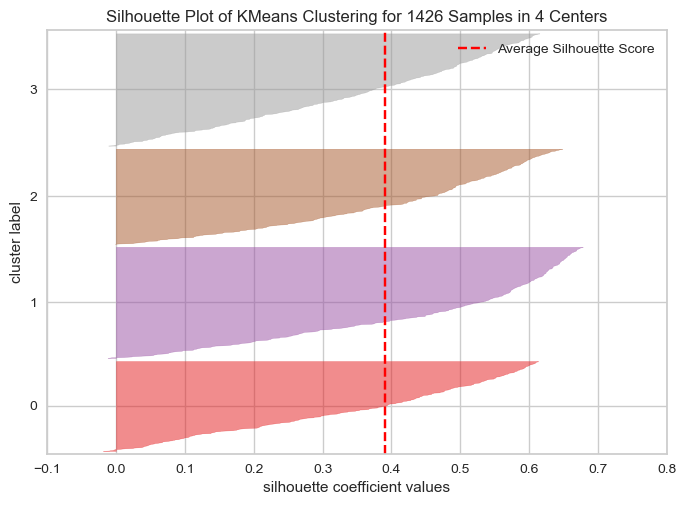

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1426 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [82]:
silhouette_visualizer = SilhouetteVisualizer(kmeans)
silhouette_visualizer.fit(data_mds)
silhouette_visualizer.show()

**Herarchical Agglomerative Clustering for MDS data.**

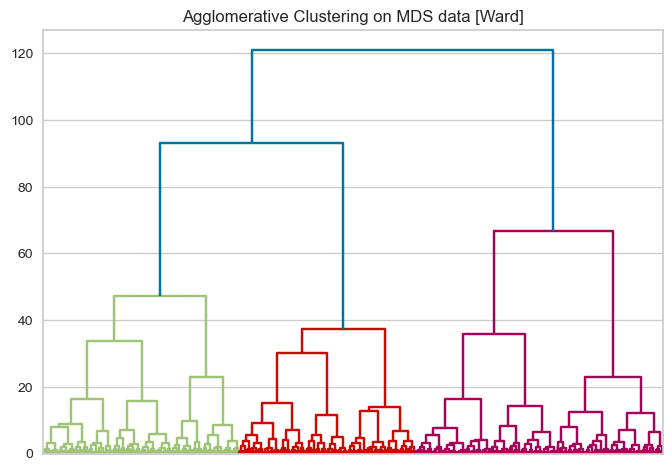

In [83]:
linked = linkage(data_mds, method='ward')
dendrogram(linked,distance_sort='descending',no_labels=True)
plt.title('Agglomerative Clustering on MDS data [Ward]')
plt.show()

In [84]:
#Obtain the clusters
agglo_labels_mds = fcluster(linked, 4, criterion='maxclust')

#Evaluate the obtained clusters

# Silhouette Score
silhouette_avg = silhouette_score(data_mds, agglo_labels_mds)
print(f'Silhouette Score: {silhouette_avg}')

# Davies-Bouldin Index
db_index = davies_bouldin_score(data_mds, agglo_labels_mds)
print(f'Davies-Bouldin Index: {db_index}')

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(data_mds, agglo_labels_mds)
print(f'Calinski-Harabasz Index: {ch_index}')

Silhouette Score: 0.3439567946191215
Davies-Bouldin Index: 0.863247978146135
Calinski-Harabasz Index: 1089.4189191866226


**KMeans for T-SNE data.**

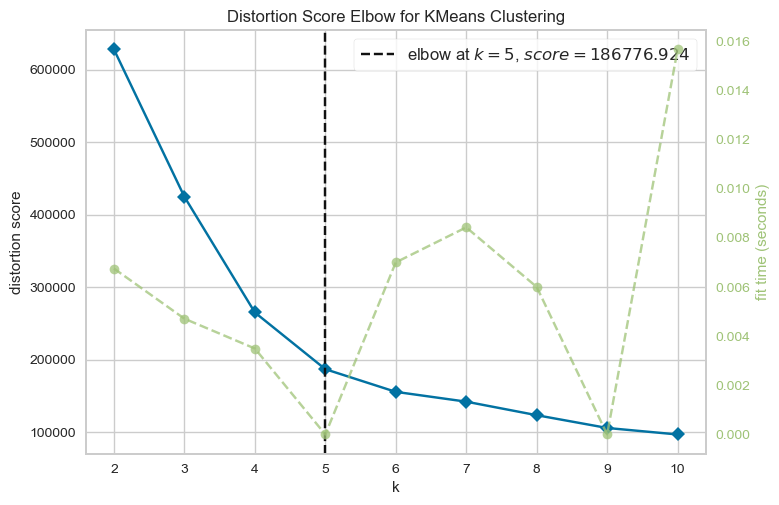

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
kmeans = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans)
elbow_visualizer.fit(data_tsne)
elbow_visualizer.show()

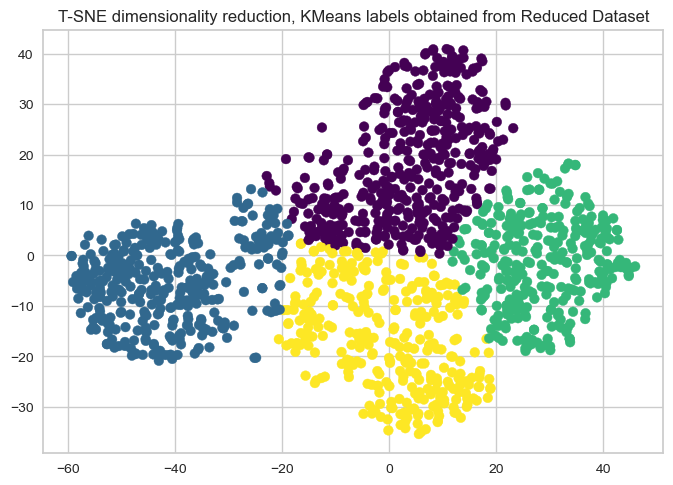

In [86]:
kmeans = KMeans(n_clusters=4,random_state=123)
kmeans_labels_tsne = kmeans.fit_predict(data_tsne)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=kmeans_labels_tsne,cmap='viridis')
plt.title('T-SNE dimensionality reduction, KMeans labels obtained from Reduced Dataset')
plt.show()

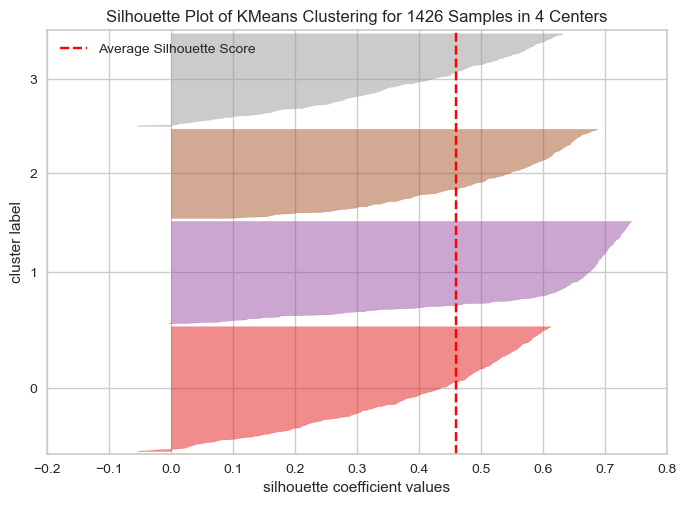

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1426 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [87]:
silhouette_visualizer = SilhouetteVisualizer(kmeans)
silhouette_visualizer.fit(data_tsne)
silhouette_visualizer.show()

In [88]:
#Evaluate the obtained clusters

# Silhouette Score
silhouette_avg = silhouette_score(data_tsne, kmeans_labels_tsne)
print(f'Silhouette Score: {silhouette_avg}')

# Davies-Bouldin Index
db_index = davies_bouldin_score(data_tsne, kmeans_labels_tsne)
print(f'Davies-Bouldin Index: {db_index}')

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(data_tsne, kmeans_labels_tsne)
print(f'Calinski-Harabasz Index: {ch_index}')

Silhouette Score: 0.4599344730377197
Davies-Bouldin Index: 0.7337286949328202
Calinski-Harabasz Index: 1944.8902555328573


**Hierarchical Agglomerative Clustering for T-SNE data.**

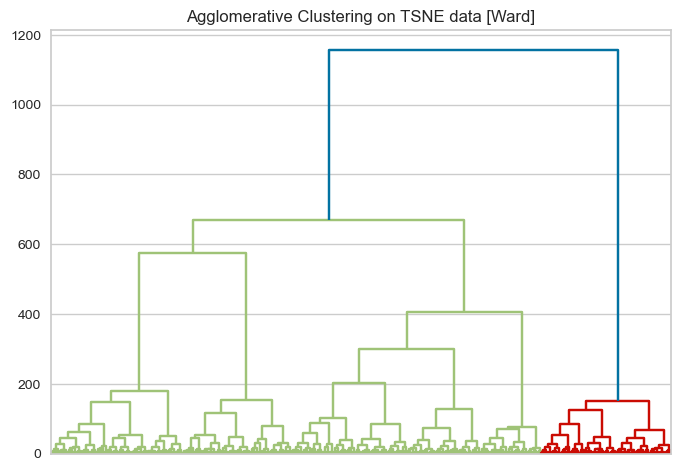

In [89]:
linked = linkage(data_tsne, method='ward')
dendrogram(linked,distance_sort='descending',no_labels=True)
plt.title('Agglomerative Clustering on TSNE data [Ward]')
plt.show()

In [90]:
#Obtain the clusters
agglo_labels_tsne = fcluster(linked, 4, criterion='maxclust')

#Evaluate the obtained clusters

# Silhouette Score
silhouette_avg = silhouette_score(data_tsne, agglo_labels_tsne)
print(f'Silhouette Score: {silhouette_avg}')

# Davies-Bouldin Index
db_index = davies_bouldin_score(data_tsne, agglo_labels_tsne)
print(f'Davies-Bouldin Index: {db_index}')

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(data_tsne, agglo_labels_tsne)
print(f'Calinski-Harabasz Index: {ch_index}')

Silhouette Score: 0.41982924938201904
Davies-Bouldin Index: 0.7953359926185397
Calinski-Harabasz Index: 1688.2578943522606


Again we see that four clusters get better scores.

We need to make the choice of which clustering-dimensionality reduction pair of algorithms to choose.
Based on the above results we can see:
- T-SNE gets better scores both with KMeans and with Hierarchical Clustering.
- Both KMeans and Hierarchical Clustering used on the reduced dataset obtained by T-SNE recognize four clusters as the most suitable number of clusters.
- KMeans get slightly better silhouette score (~0.46 vs ~0.44) than hierarchical clustering.

So the choice is to apply T-SNE dimensionality reduction and use KMeans to obtain the clusters.

In [91]:
df['cluster'] = kmeans_labels_tsne

<a name="Presenting"></a>
# Presenting Results
___

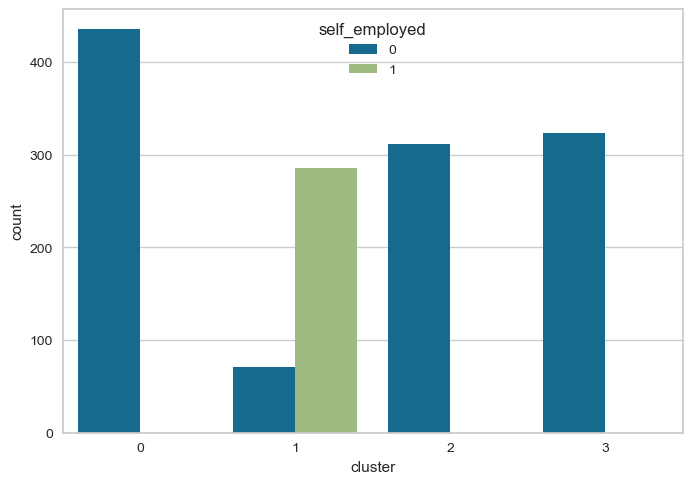

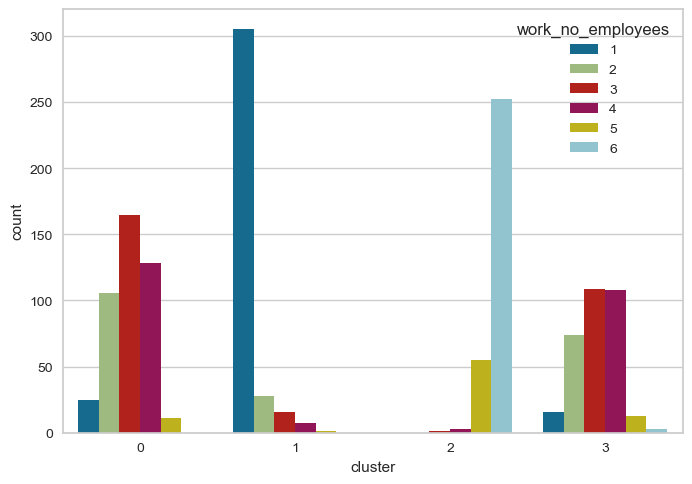

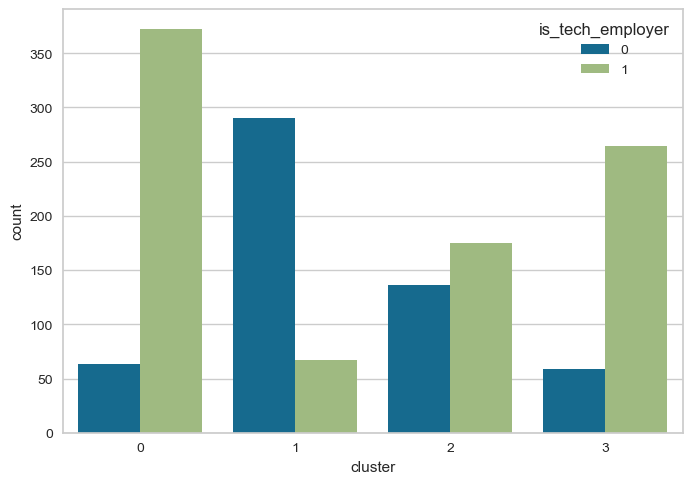

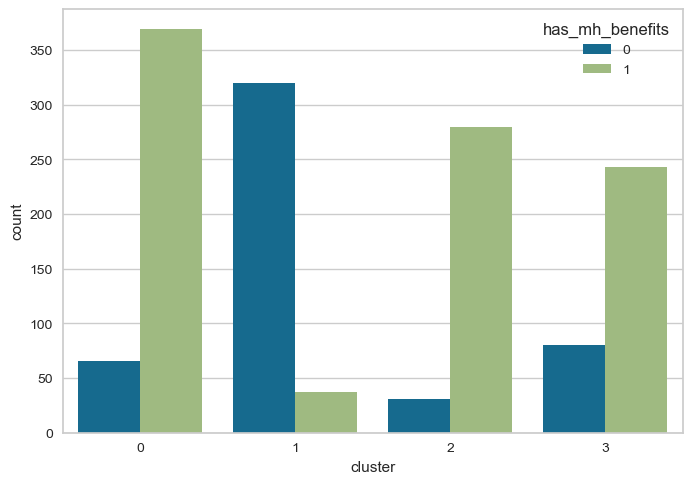

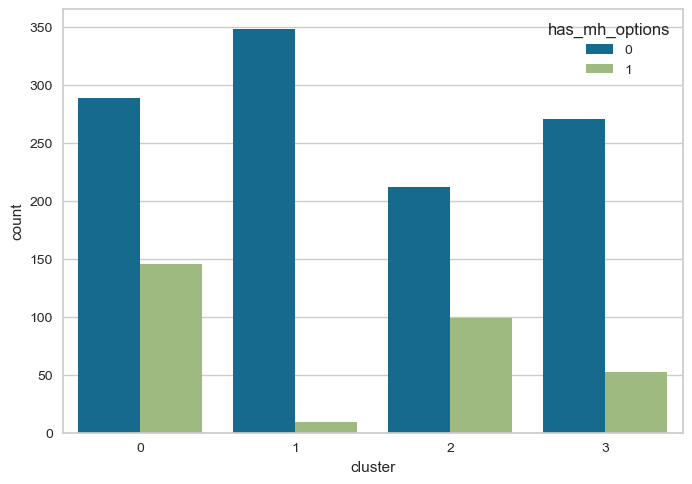

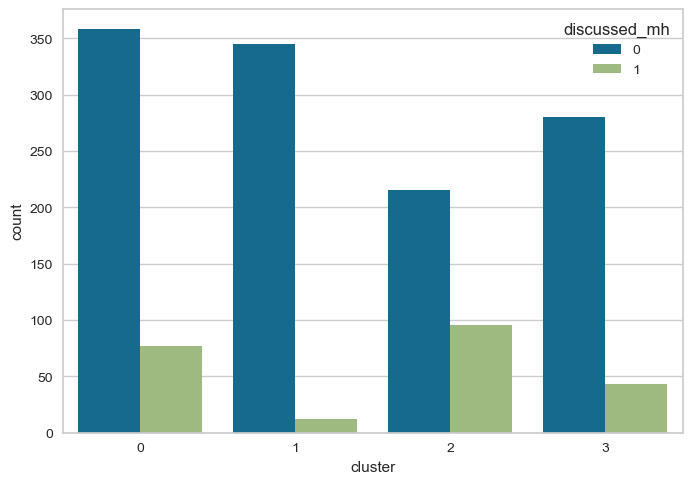

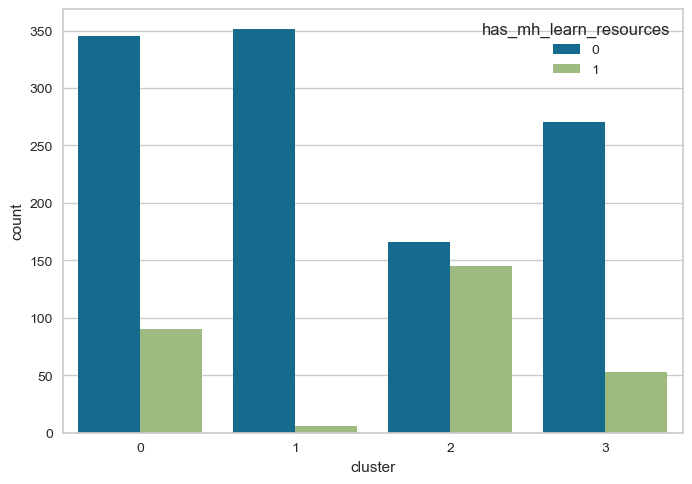

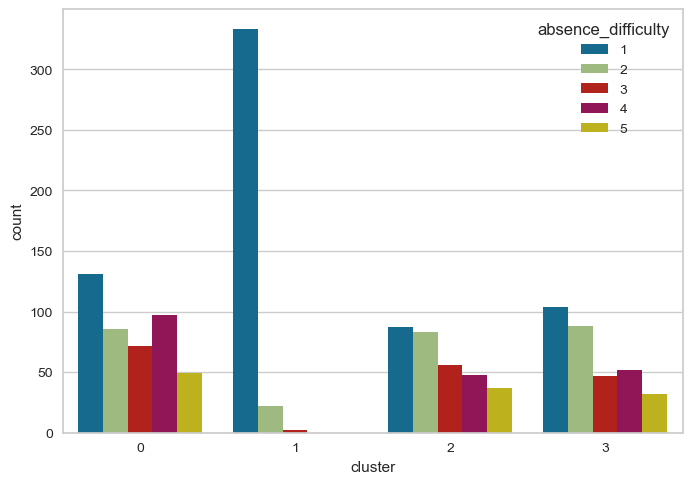

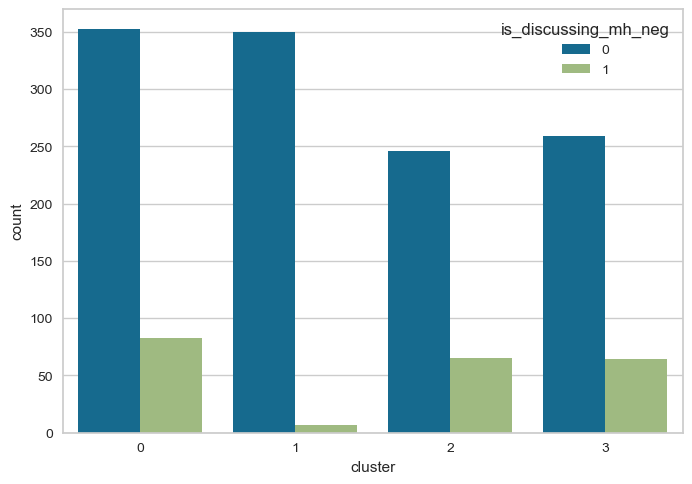

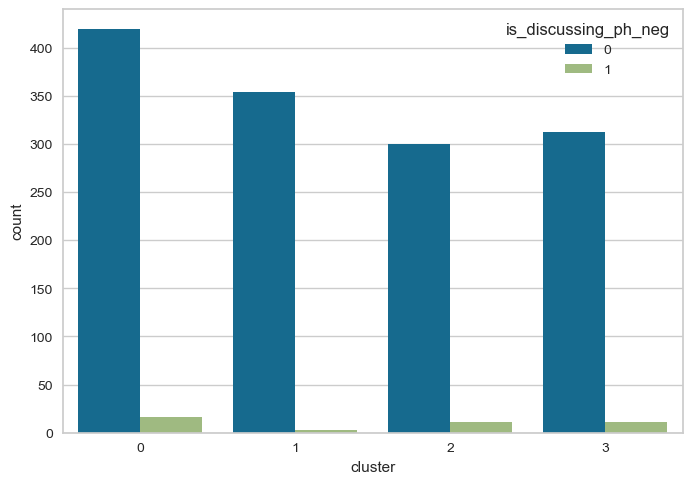

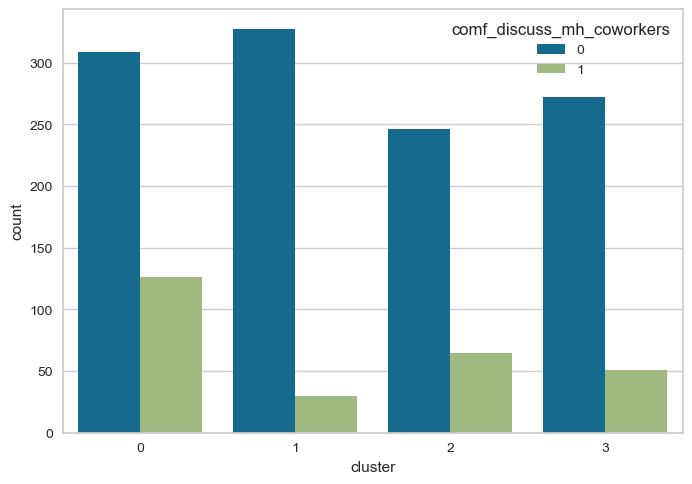

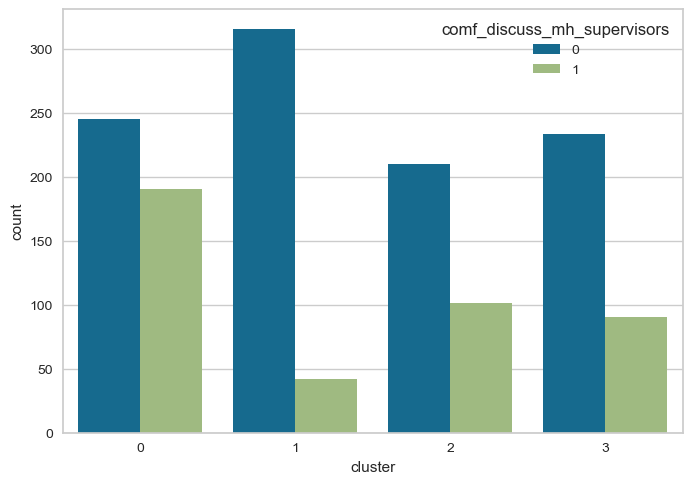

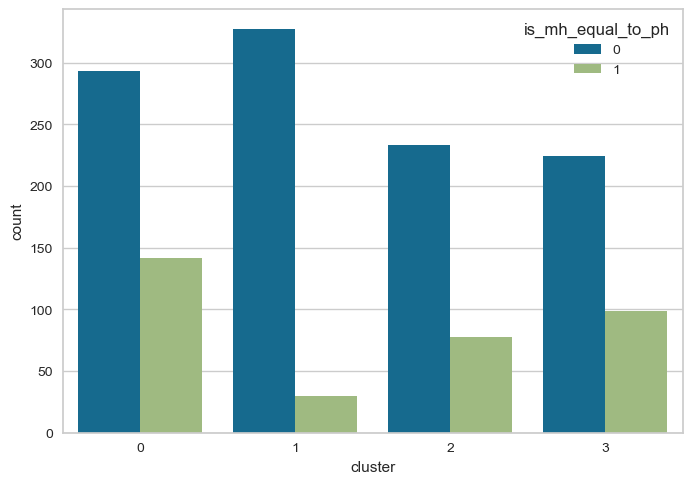

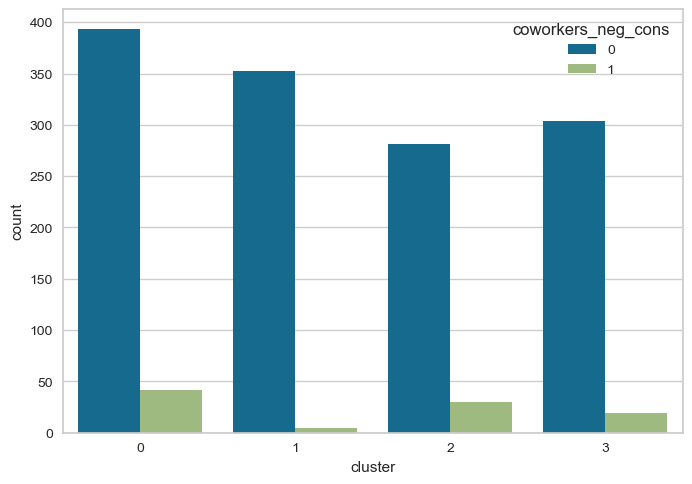

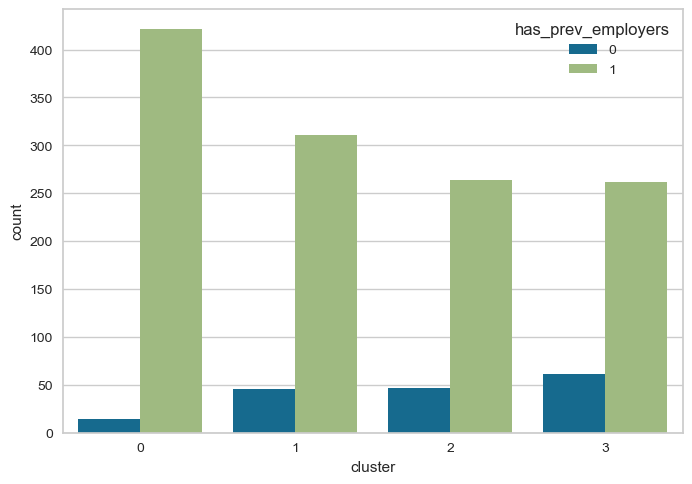

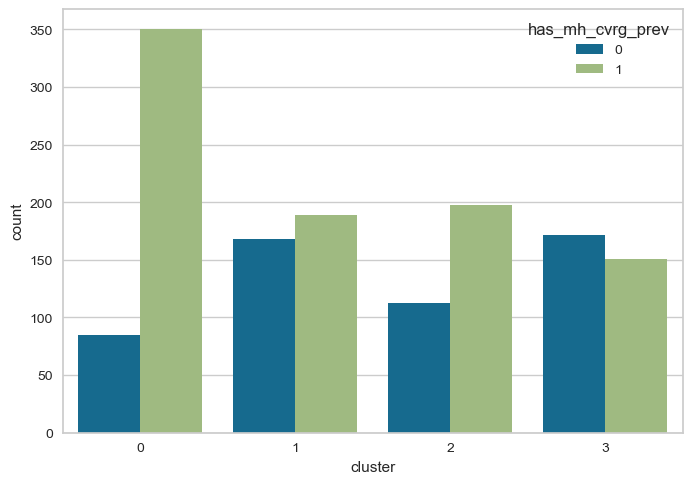

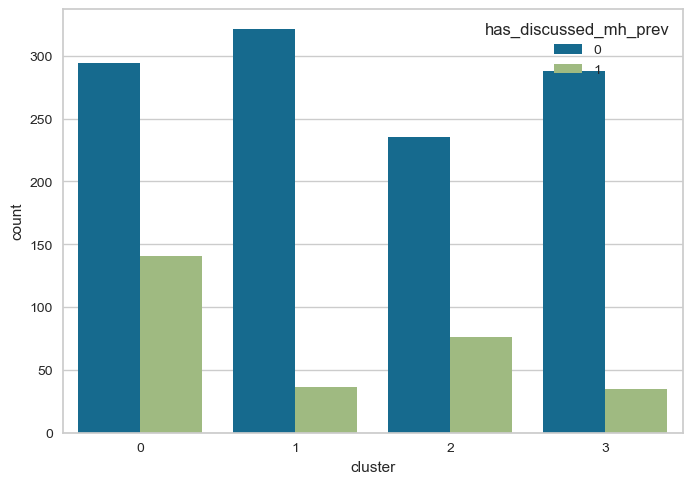

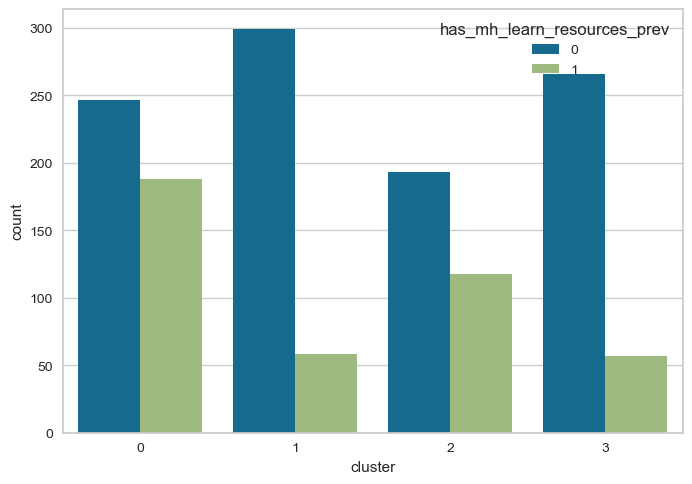

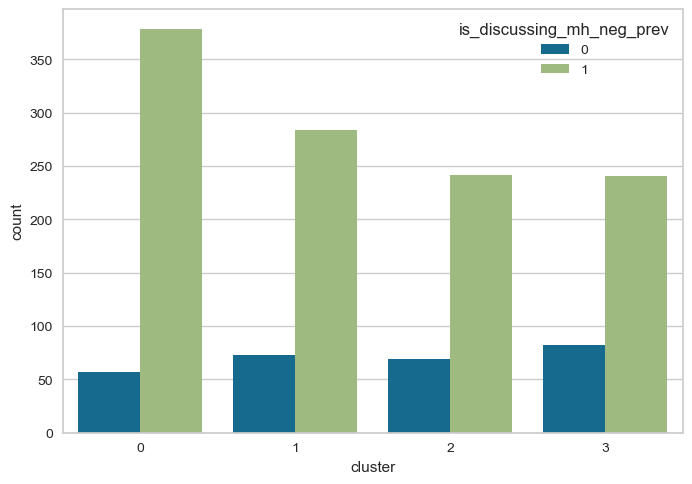

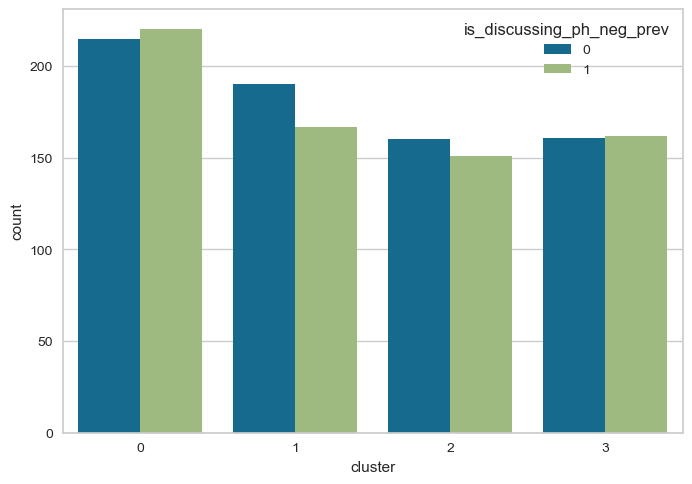

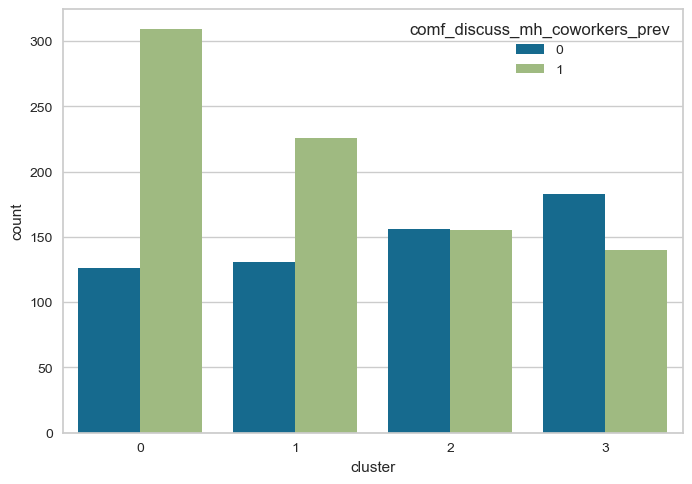

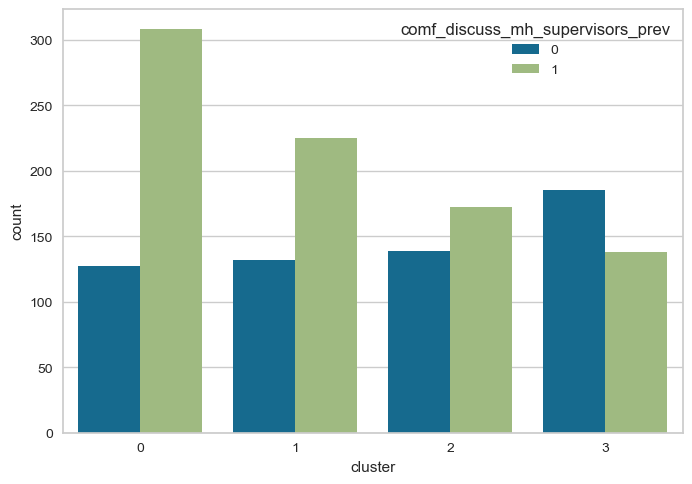

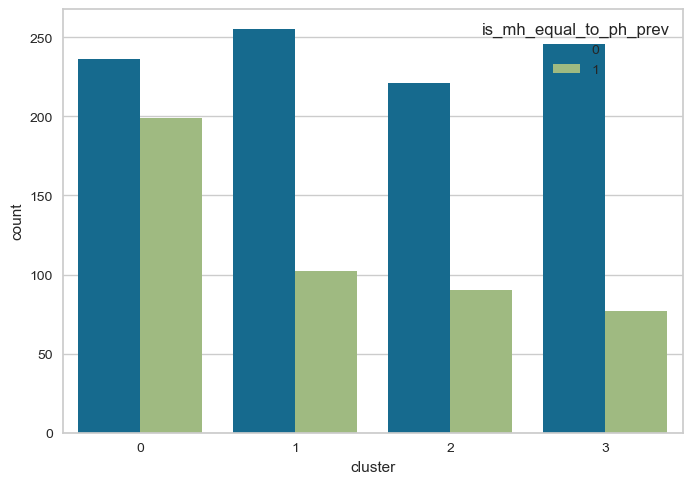

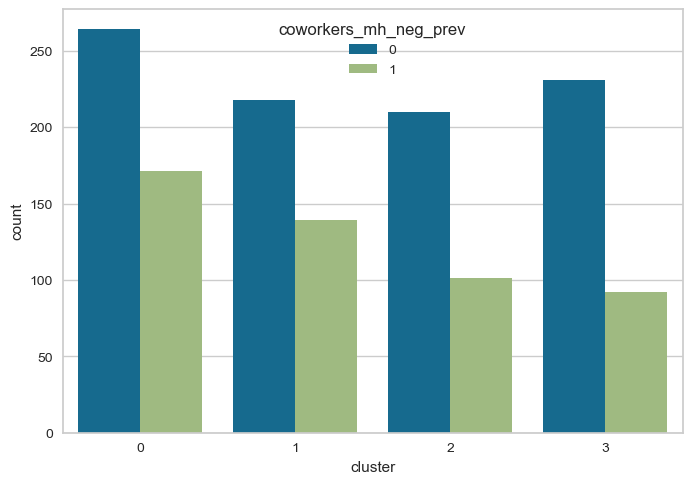

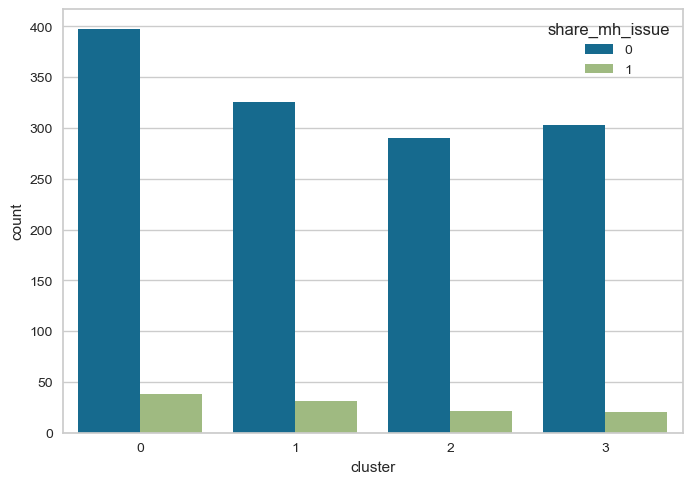

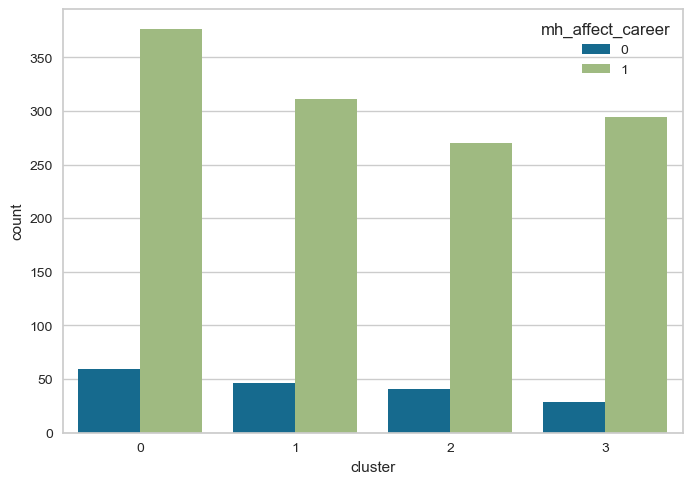

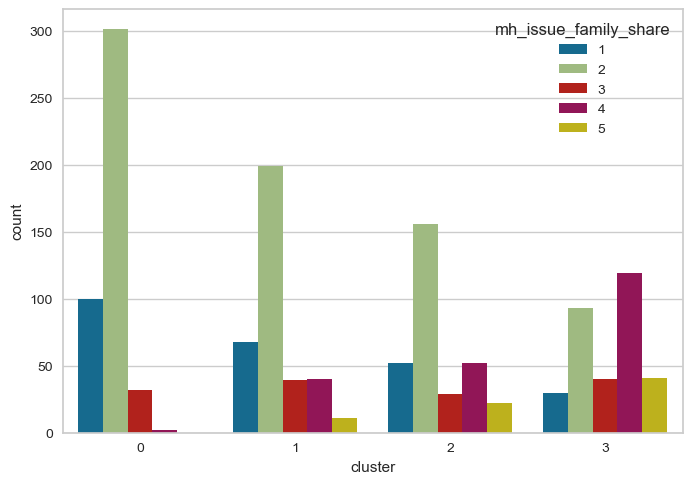

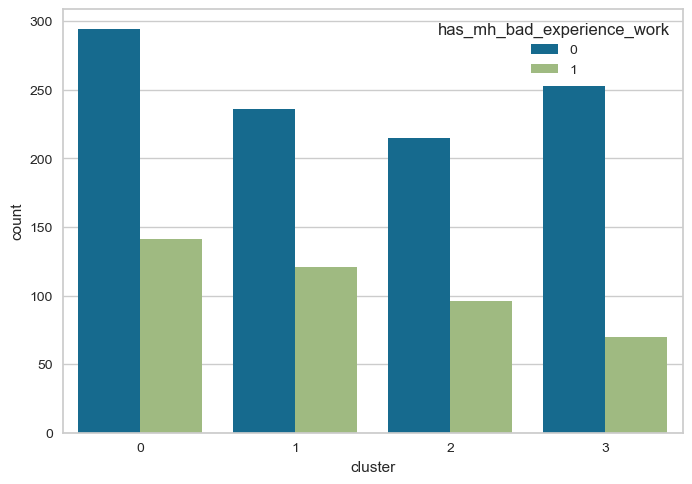

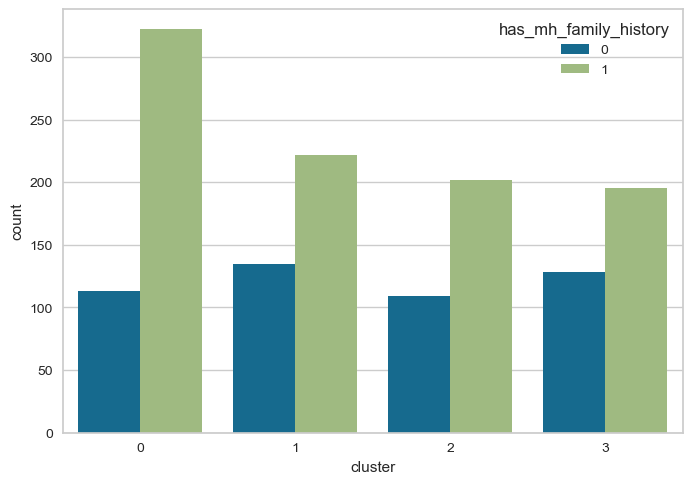

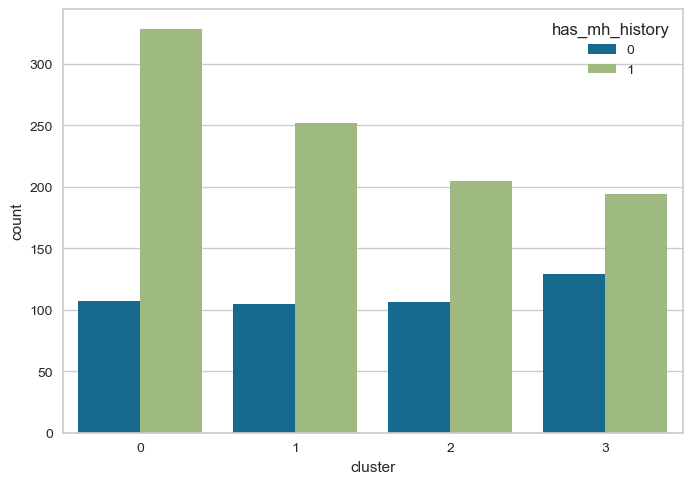

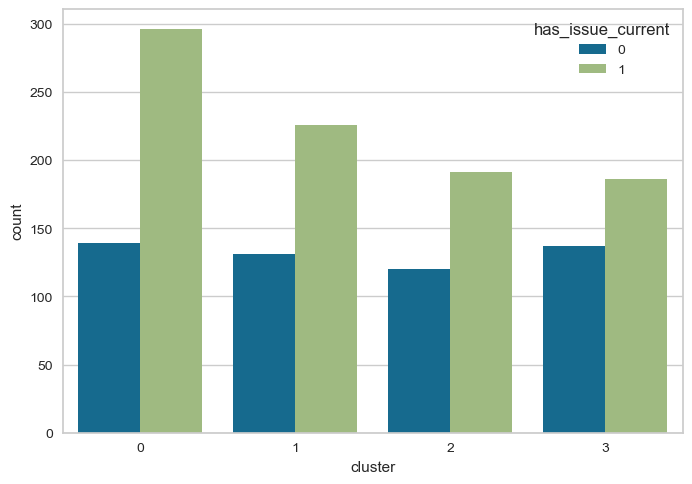

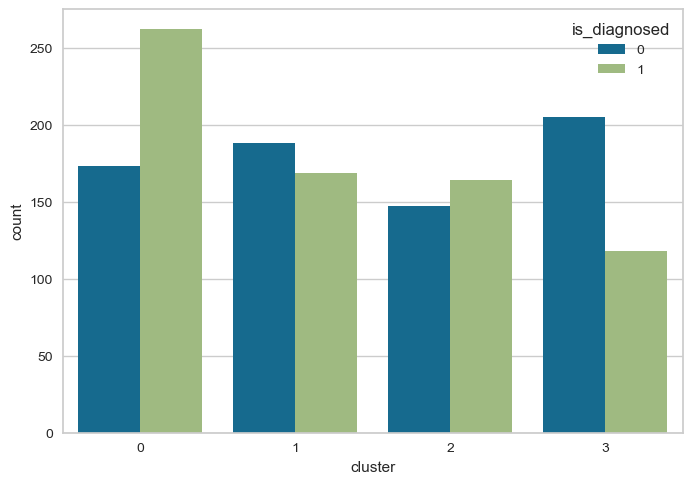

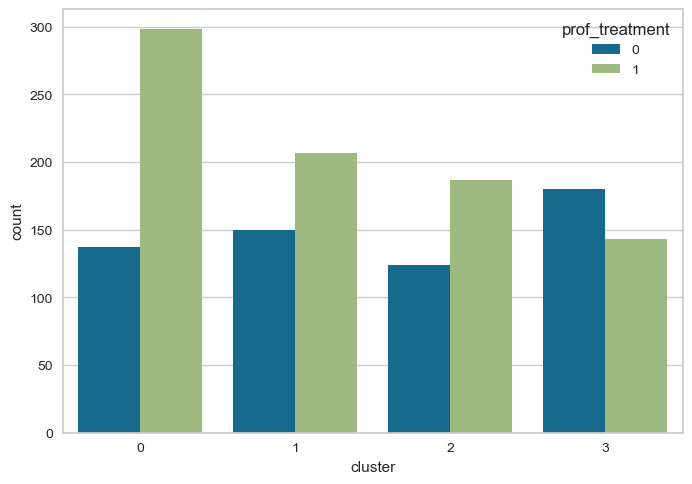

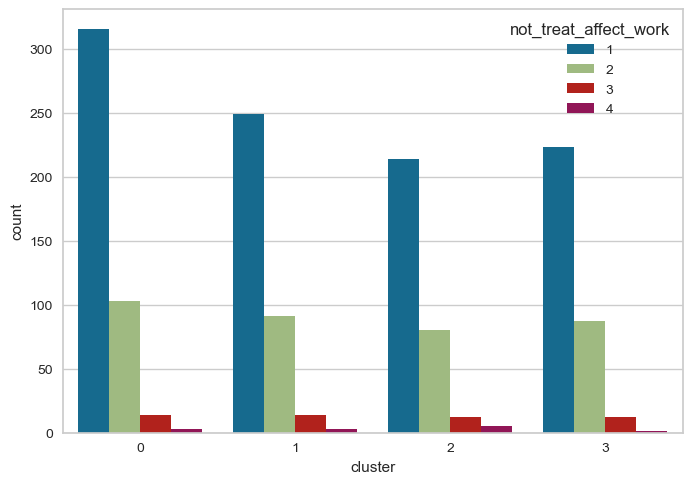

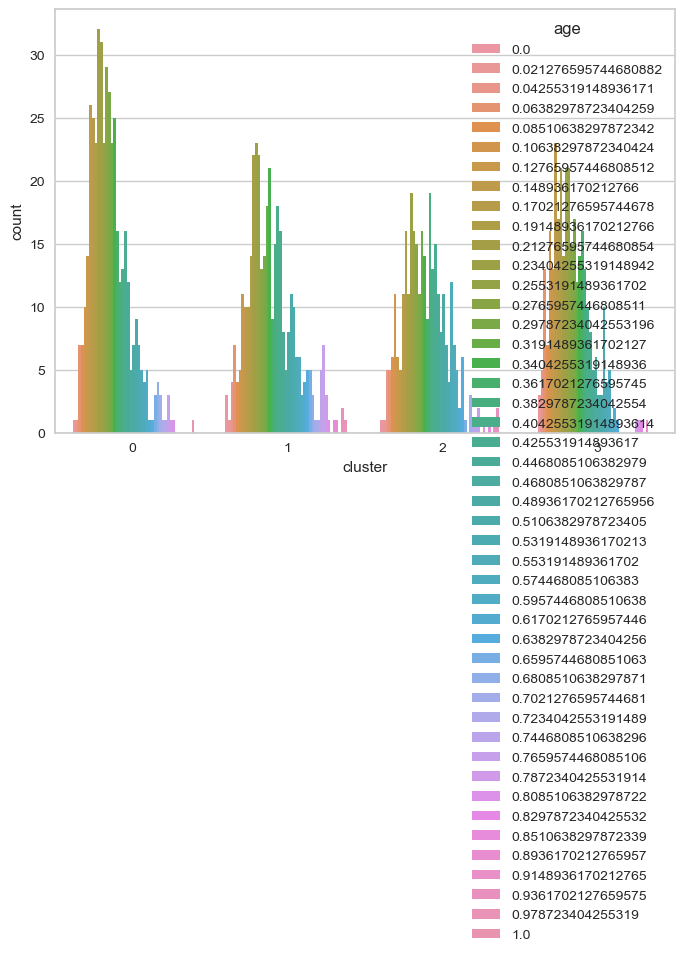

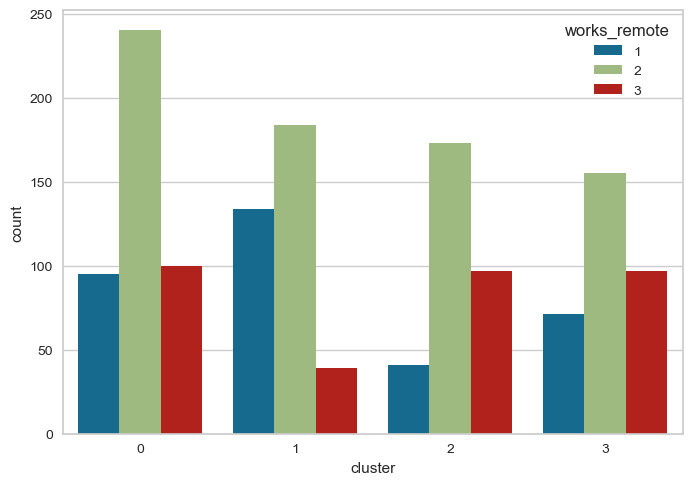

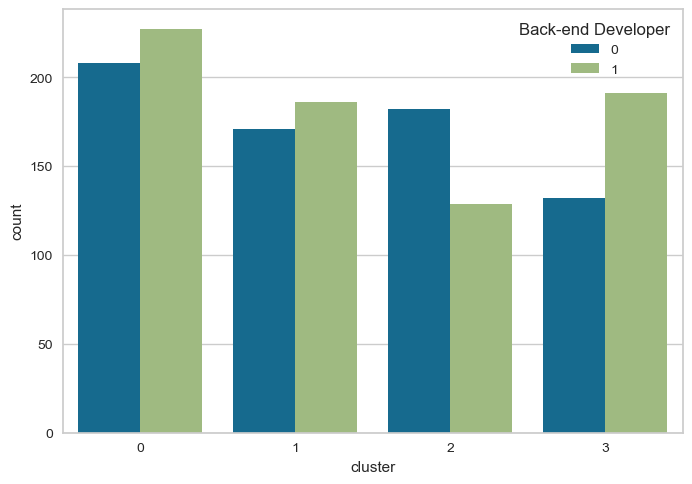

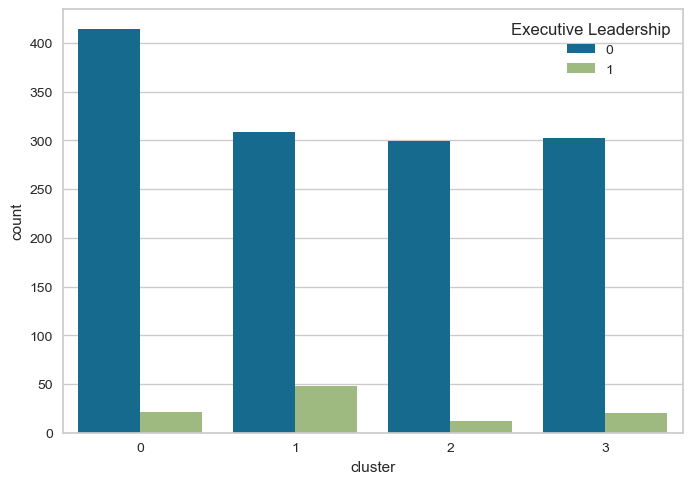

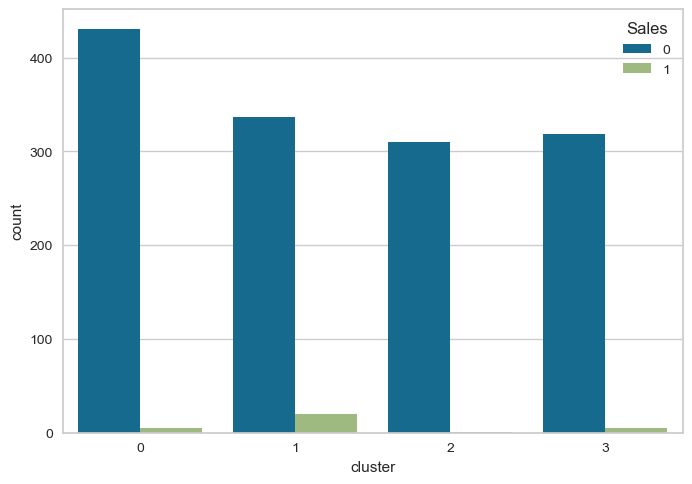

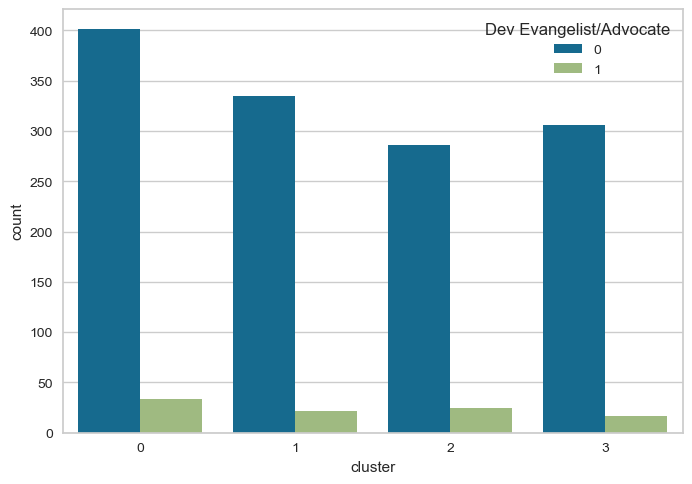

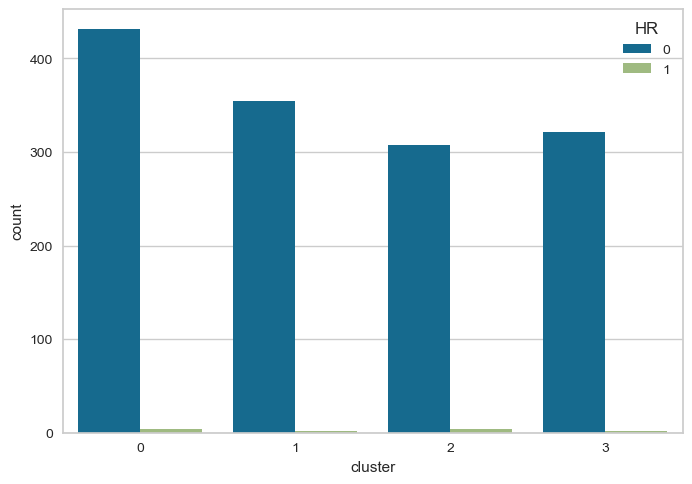

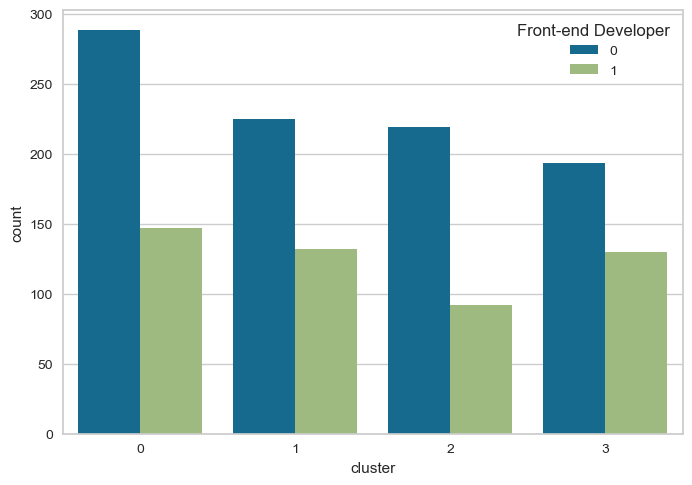

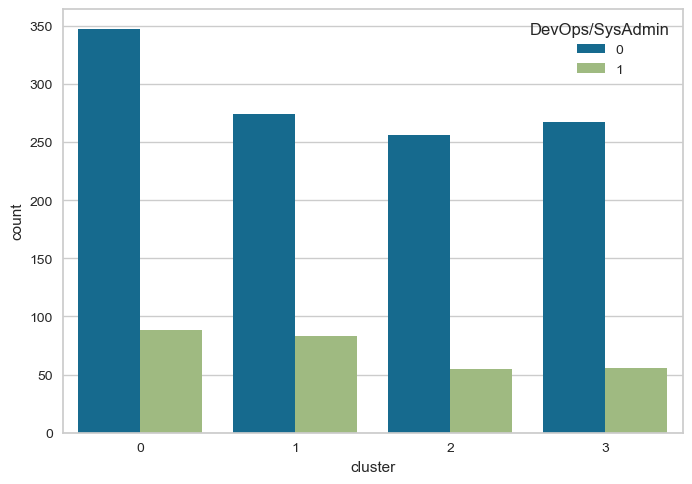

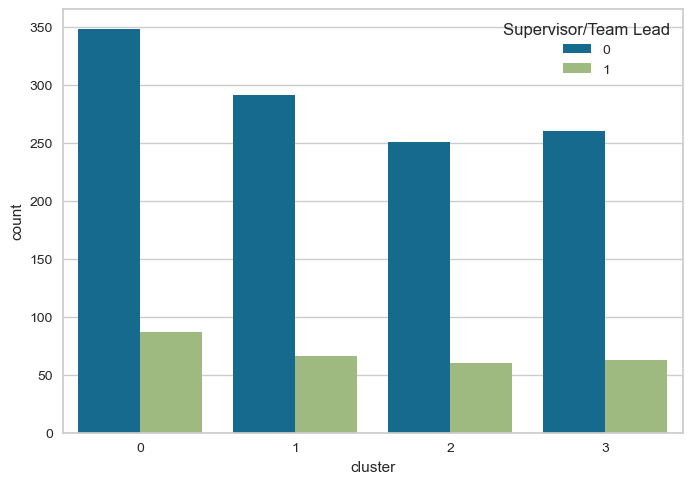

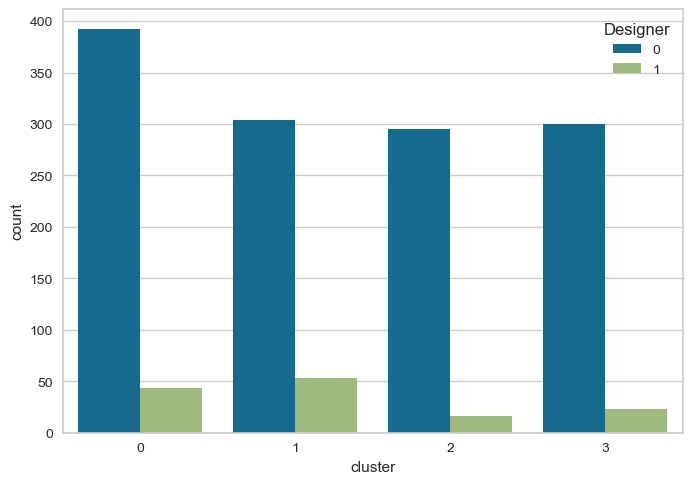

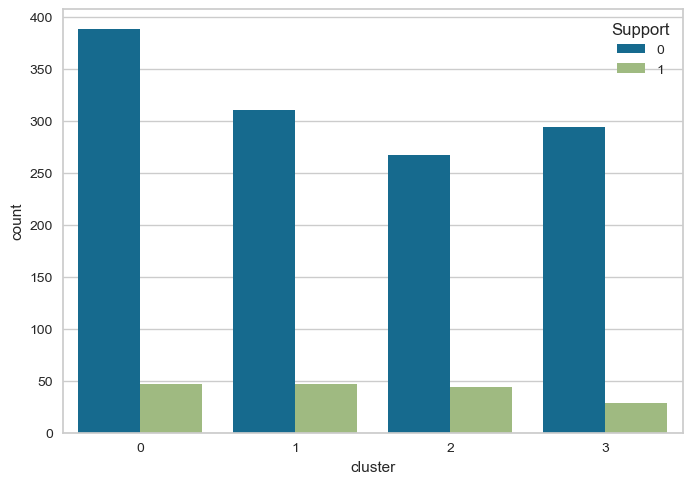

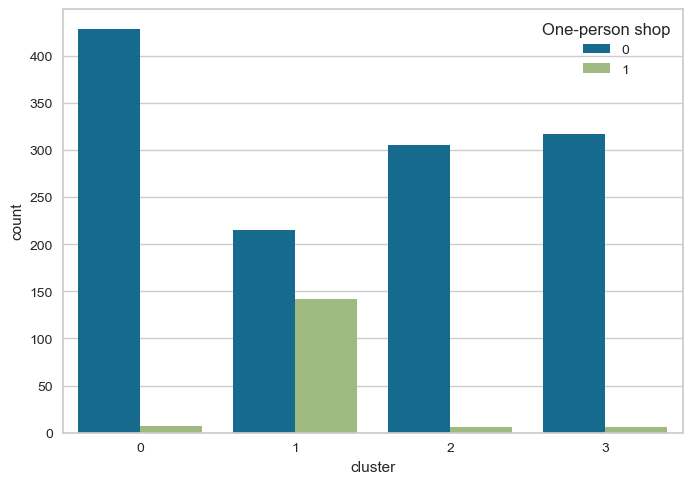

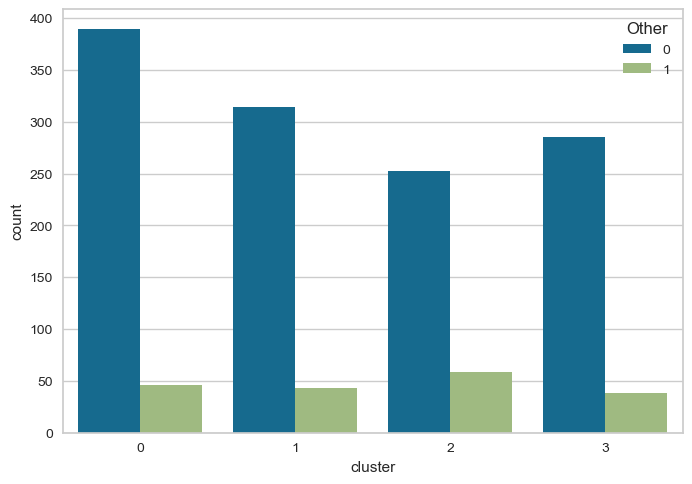

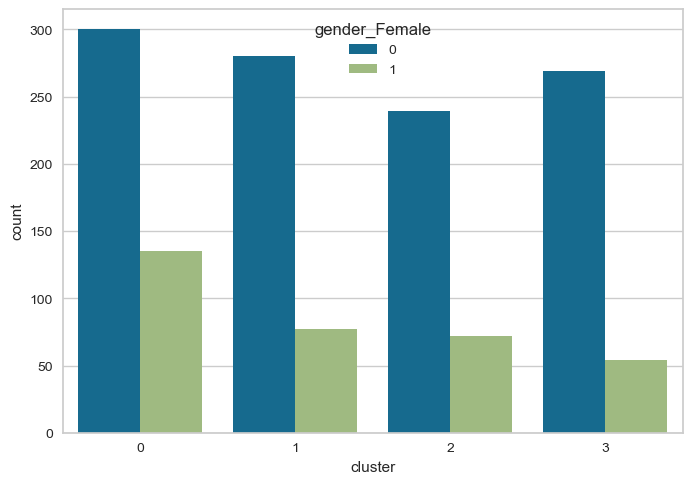

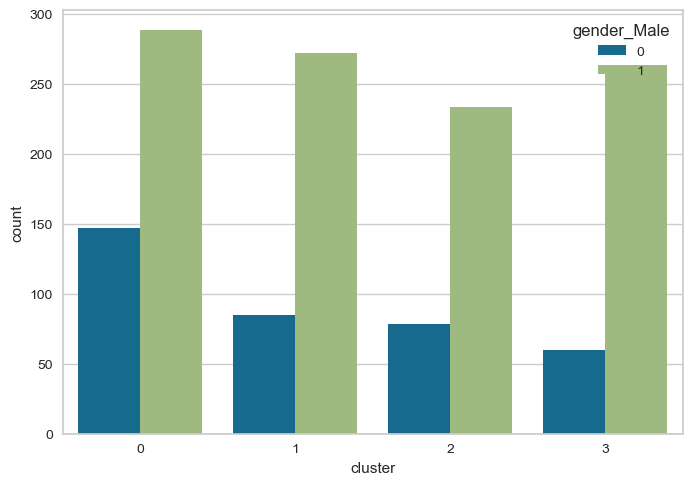

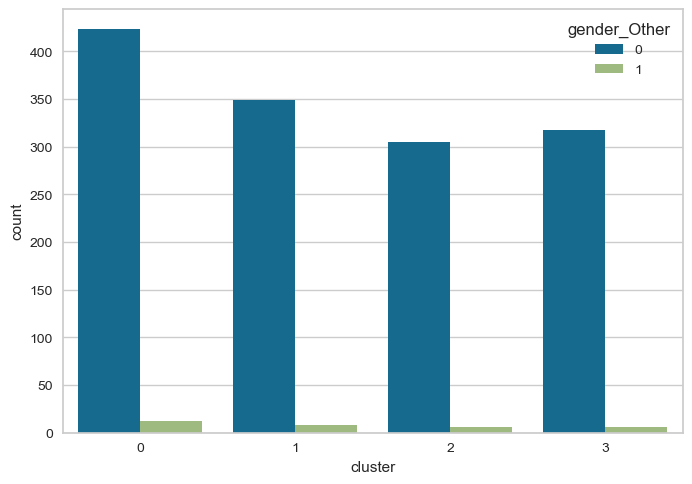

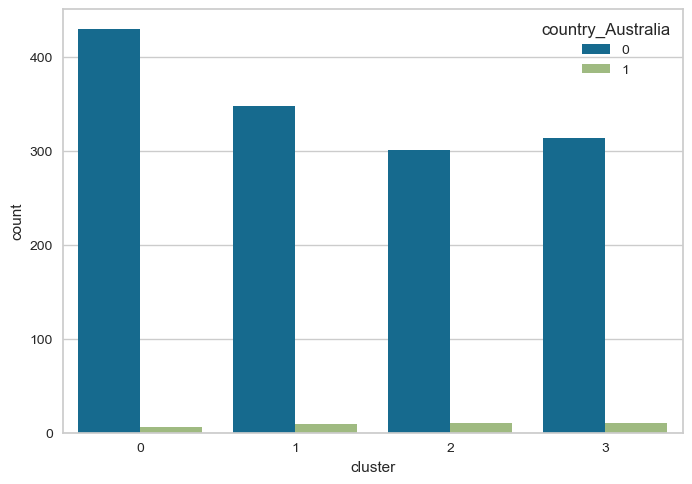

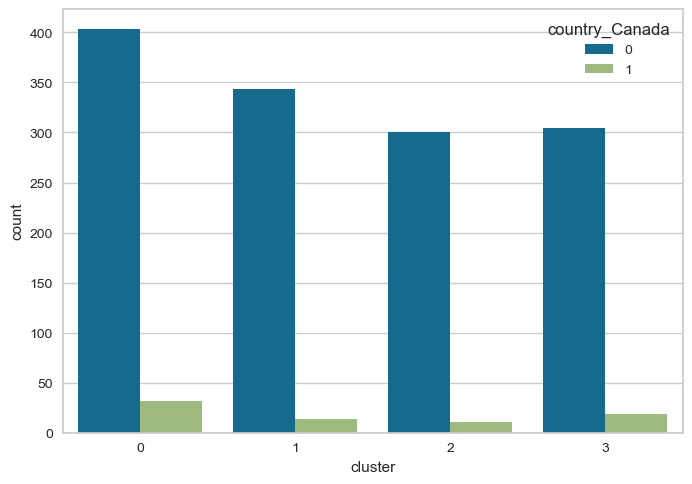

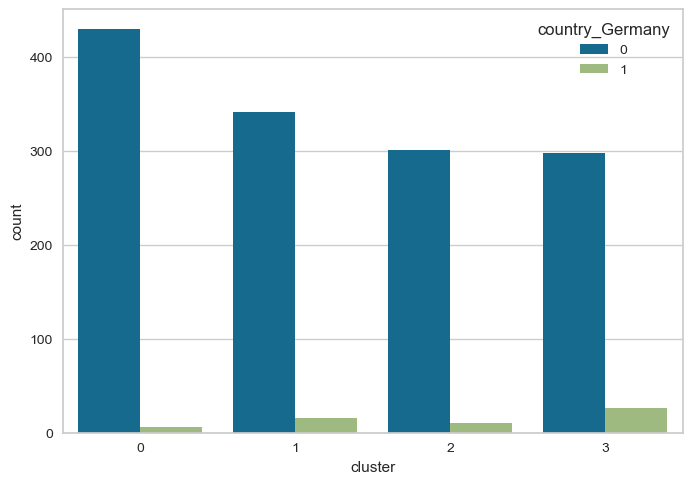

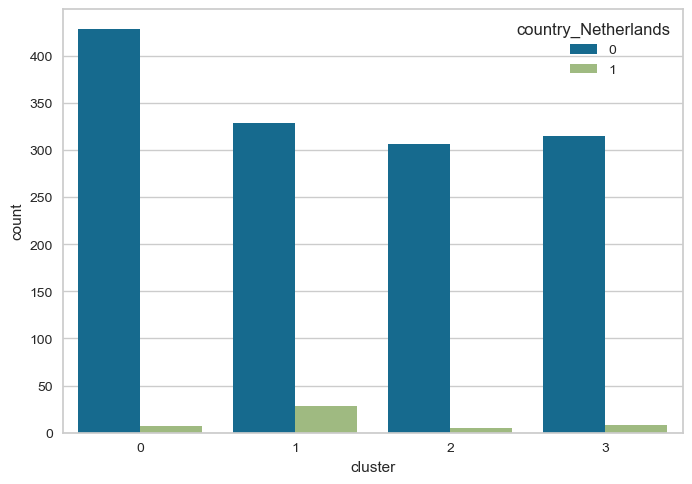

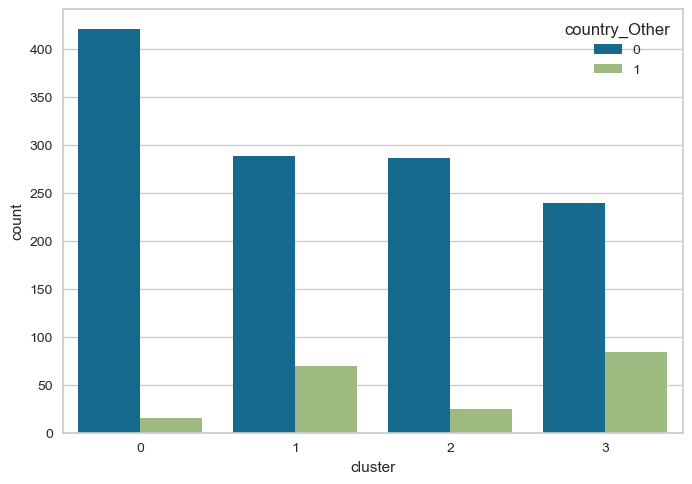

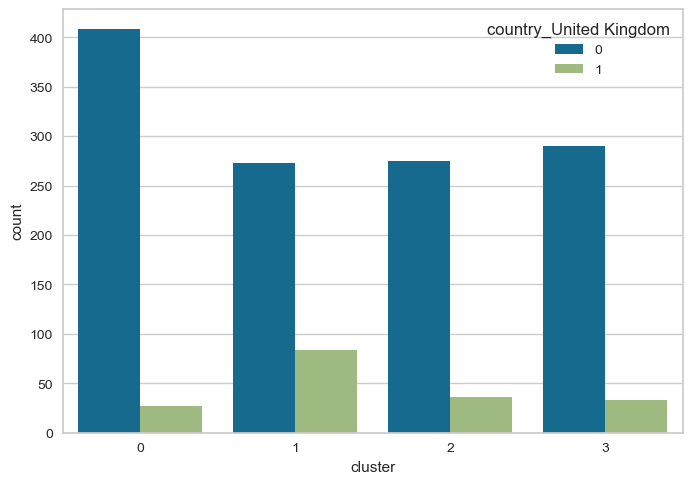

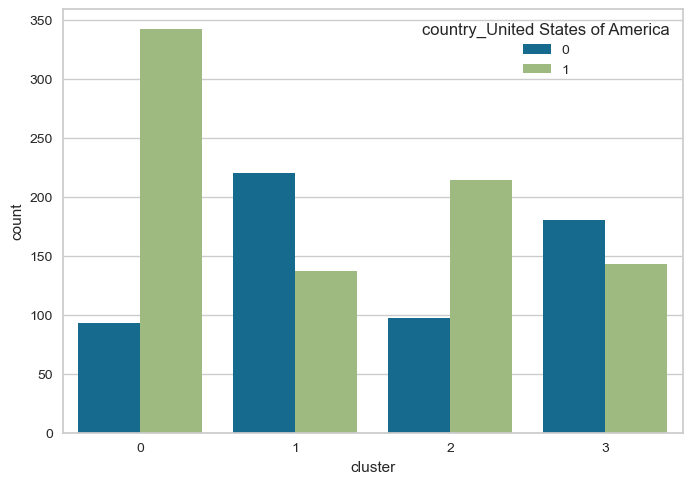

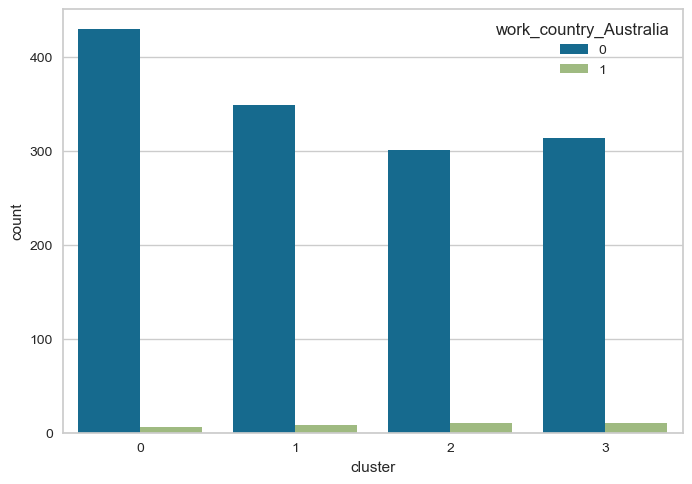

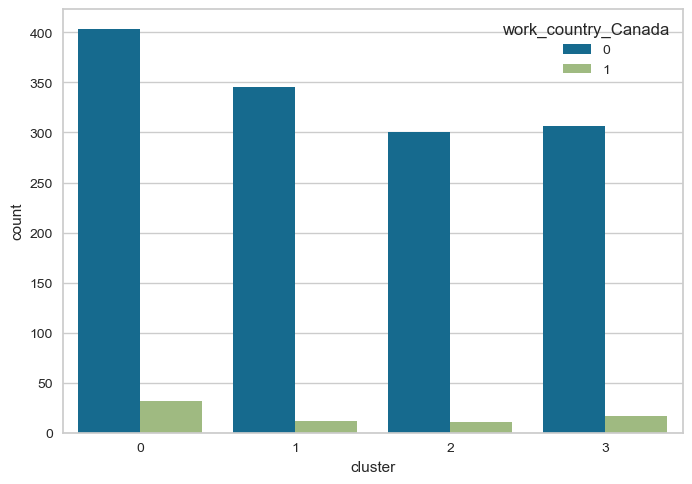

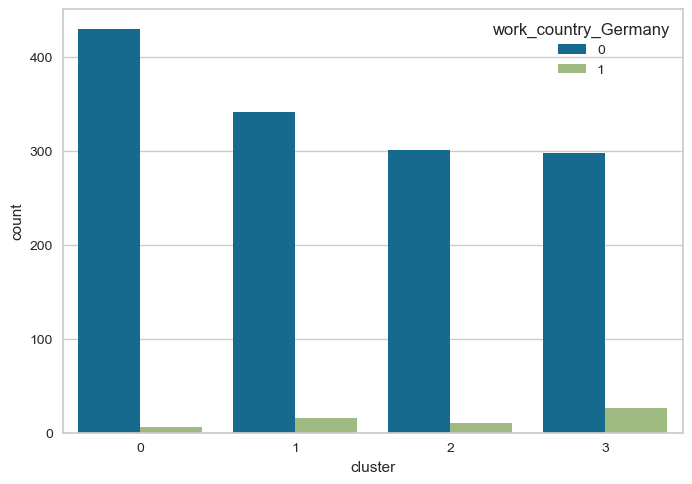

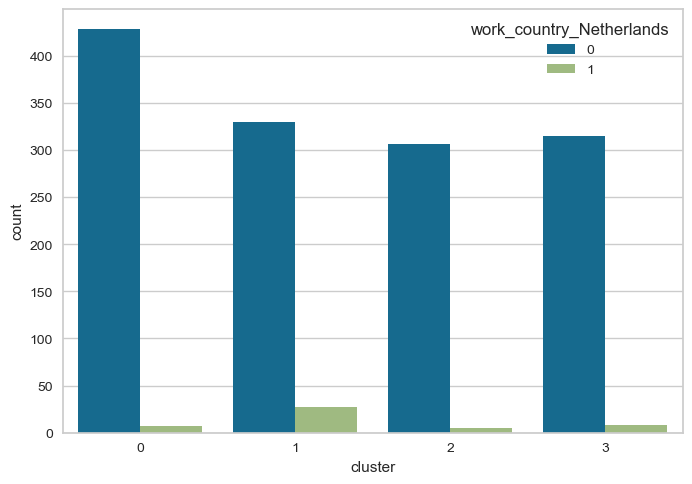

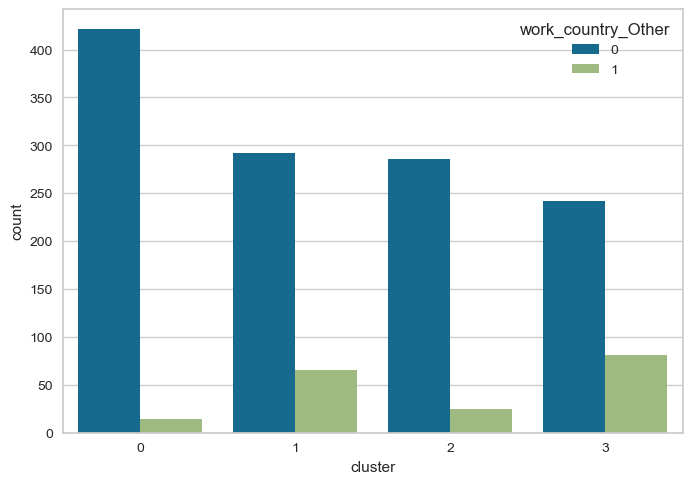

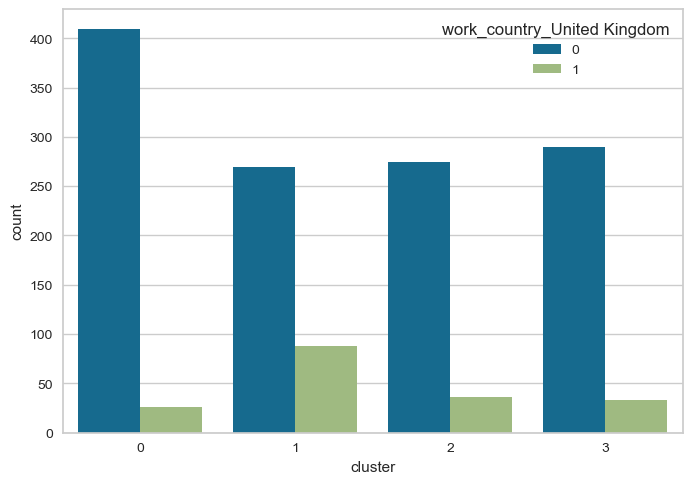

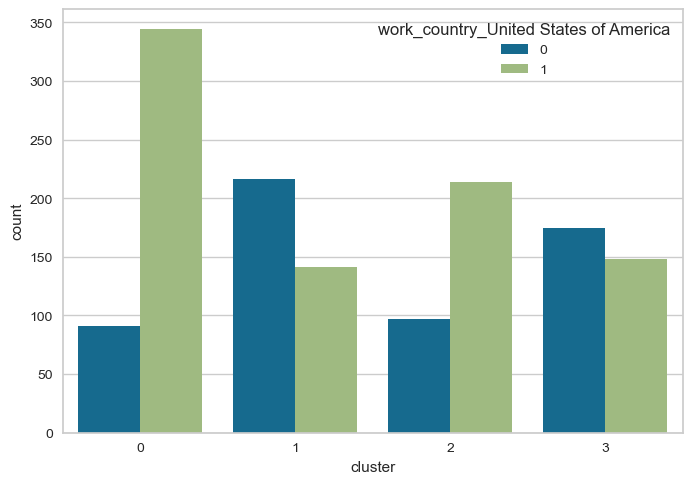

In [92]:
for col in df.columns[:-1]:
    partial_df = df[[col,'cluster']].value_counts().reset_index().sort_values(by='cluster')
    sns.barplot(x='cluster',y='count',hue=col,data=partial_df)
    plt.show()

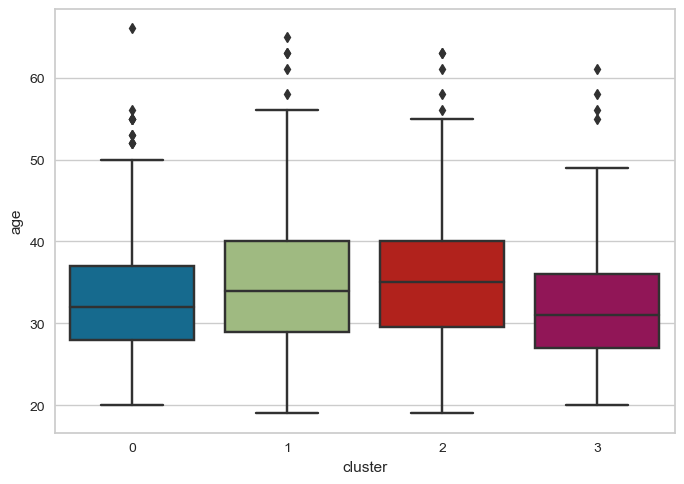

In [93]:
age_restored = [int(x*(66-19)+19) for x in df['age'].values]
df_age = pd.DataFrame({'age':age_restored,'cluster':df.cluster})

sns.boxplot(x='cluster',y='age',data=df_age)
plt.show()

+ **Cluster 0:**
    + People work at medium sized companies (26-100 and 100-500).
    + They feel comfortable discussing mental health issues with coworkers.
    + They feel comfortable discussing mental health issues with supervisors.
    + Many people think that employers take mental health issues as seriously as physical health issues.
    + They find it relatively easy to share family mental health issues.
    + Less people have mental health family history or mental health history themselves in comparison with people in other clusters.
    + Mostly they are not diagnosed with a mental health issue.
    + They are more flexible in working remote.
    + Majority of job positions are Supervisors/Team Lead and Backend Developers.
    + There are many people from Netherlands and UK.
    + They are younger people in average. (>~ 28 and <~ 35).
    
+ **Cluster 1:**
    + People work mostly in big companies (>1000).
    + They are provided with resources to learn about mental health concerns.
    + They are provided with more mental health benefits and options for mental health in comparison with people in other clusters.
    + They are more flexible in asking for medical leave due to a mental health issue.
    + If they have a mental health issue, they are mostly diagnosed.
    + They tend to seek professional treatment.
    + There are not so many Backend and Frontend developers.
    + The majority of people work and live in the USA.
    
+ **Cluster 2:**
    + They are self-employed.
    + They do not work for tech companies.
    + Leaving job due to a medical health issue is easy.
    + Many people come from other countries, outside USA and work remotely.
    
+ **Cluster 3:**
    + People work at medium sized companies (6-25 and 26-100).
    + Asking for a medical leave due to a mental health issue is relatively hard.
    + Many people think that discussing a mental health issue with their employer would have negative consequences.
    + They feel less comfortable discussing mental health issues with coworkers and supervisors.
    + People are relatively older in comparison with people in other clusters.

Similarities in all clusters:
   + People think that discussing mental health issues with coworkers would not have negative consequences.
   + People find it diffucult to share a mental health issue.
   + People think that mental health issues affect their career.
   + People think that if they have a mental health issue which is not treated would affect their work.
   + Females work mostly in big companies.
   + Majority of people who took this survey were males.